# **Section 1: Data cleanup**

In [7]:
from datascience import *
import pandas as pd
import numpy as np

In [8]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df_schema = pd.read_csv('UN_MigrantStockTotal_2015.csv')
df_annex = pd.read_csv('UN_MigrantStockTotal_2015_ANNEX.csv')
df_notes = pd.read_csv('UN_MigrantStockTotal_2015_NOTES.csv')
df1 = pd.read_csv('UN_MigrantStockTotal_2015_Table1.csv')
df2 = pd.read_csv('UN_MigrantStockTotal_2015_Table2.csv')
df3 = pd.read_csv('UN_MigrantStockTotal_2015_Table3.csv')
df4 = pd.read_csv('UN_MigrantStockTotal_2015_Table4.csv')
df5 = pd.read_csv('UN_MigrantStockTotal_2015_Table5.csv')
df6a = pd.read_csv('UN_MigrantStockTotal_2015_Table6.csv')
df6b = pd.read_csv('UN_MigrantStockTotal_2015_Table6.csv')
df6c = pd.read_csv('UN_MigrantStockTotal_2015_Table6.csv')

In [9]:
#cleaning dataframe schema
df_schema = df_schema.rename(columns={'Unnamed: 0': 'table', 'Unnamed: 1': 'Ttitle'
                                     })

df_schema.drop(df_schema.iloc[:, 2:], inplace = True, axis = 1)
df_schema.drop(df_schema.index[:15], inplace = True)
df_schema.drop(df_schema.index[8:], inplace = True)
df_schema.reset_index(drop=True, inplace=True)

df_schema

table                                             Ttitle
0  Table 1  International migrant stock at mid-year by sex...
1  Table 2  Total population at mid-year by sex and by maj...
2  Table 3  International migrant stock as a percentage of...
3  Table 4  Female migrants as a percentage of the interna...
4  Table 5  Annual rate of change of the migrant stock by ...
5  Table 6  Estimated refugee stock at mid-year by major a...
6    ANNEX  Classification of countries and areas by major...
7    NOTES                                              NOTES

In [10]:
#cleaning dataframe notes
df_notes = df_notes.rename(columns={'Unnamed: 0': 'label', 'Unnamed: 1': 'note'
                                     })

df_notes.drop(df_notes.iloc[:, 2:], inplace = True, axis = 1)
df_notes.drop(df_notes.index[:14], inplace = True)
df_notes.drop(df_notes.index[27:], inplace = True)
df_notes.reset_index(drop=True, inplace=True)

df_notes

label                                               note
0    (a)  The column labeled “Type of data” indicates wh...
1    (b)  More developed regions comprise Europe, Northe...
2    (c)  Less developed regions comprise all regions of...
3    (d)  The least developed countries, as defined by t...
4    (e)  Sub-Saharan Africa refers to all of Africa exc...
5    (1)    Including Agalega, Rodrigues and Saint Brandon.
6    (2)                                Including Zanzibar.
7    (3)  The estimates for 1990 to 2005 refer to Sudan ...
8    (4)          Including Ascension and Tristan da Cunha.
9    (5)  For statistical purposes, the data for China d...
10   (6)  As of 1 July 1997, Hong Kong became a Special ...
11   (7)  As of 20 December 1999, Macao became a Special...
12   (8)                       Including Sabah and Sarawak.
13   (9)                        Including Nagorno-Karabakh.
14  (10)                         Including Northern-Cyprus.
15  (11)              Including Abkhazia and South Ossetia.
16  (12)  Including East Jerusalem. Refugees are not par...
17  (13)                            Including Transnistria.
18  (14)                    Refers to Guernsey, and Jersey.
19  (15)                           Including Åland Islands.
20  (16)          Including Svalbard and Jan Mayen Islands.
21  (17)                  Refers to the Vatican City State.
22  (18)  Including Kosovo. The estimates for 1990 and 2...
23  (19)       Including Canary Islands, Ceuta and Melilla.
24  (20)  The estimates for 1990 to 2005 refer to the fo...
25  (21)  Including Saint-Barthélemy and Saint-Martin (F...
26  (22)  Including Christmas Island, Cocos (Keeling) Is...

In [11]:
#cleaning annex
df_annex = df_annex.rename(columns ={'Unnamed: 0': 'country_code', 'Unnamed: 1': 'country_or_area','Unnamed: 2': 'sort_order',
                                     'Unnamed: 3': 'major_area','Unnamed: 4': 'major_area_code','Unnamed: 5': 'sort_order2',
                                     'Unnamed: 6': 'region','Unnamed: 7': 'region_code','Unnamed: 8': 'sort_order3',
                                     'Unnamed: 9': 'developed_region?','Unnamed: 10': 'least_developed_country?','Unnamed: 11': 'sub_saharan_africa?'
                                    })

df_annex.drop(df_annex.index[:14], inplace = True)

#setting first sort_order as main identifier
df_annex.drop(['sort_order2', 'sort_order3'], axis = 1, inplace = True)
df_annex = df_annex.set_index('sort_order')

df_annex

country_code                                    country_or_area  \
sort_order                                                                   
99                    4                                        Afghanistan   
154                   8                                            Albania   
40                   12                                            Algeria   
257                  16                                     American Samoa   
155                  20                                            Andorra   
30                   24                                             Angola   
182                 660                                           Anguilla   
183                  28                                Antigua and Barbuda   
218                  32                                          Argentina   
109                  51                                            Armenia   
184                 533                                              Aruba   
240                  36                                          Australia   
171                  40                                            Austria   
110                  31                                         Azerbaijan   
185                  44                                            Bahamas   
111                  48                                            Bahrain   
100                  50                                         Bangladesh   
186                  52                                           Barbados   
129                 112                                            Belarus   
172                  56                                            Belgium   
209                  84                                             Belize   
54                  204                                              Benin   
233                  60                                            Bermuda   
101                  64                                             Bhutan   
219                  68                   Bolivia (Plurinational State of)   
156                  70                             Bosnia and Herzegovina   
48                   72                                           Botswana   
220                  76                                             Brazil   
187                  92                             British Virgin Islands   
87                   96                                  Brunei Darussalam   
130                 100                                           Bulgaria   
55                  854                                       Burkina Faso   
9                   108                                            Burundi   
88                  116                                           Cambodia   
31                  120                                           Cameroon   
234                 124                                             Canada   
56                  132                                         Cabo Verde   
188                 535                   Bonaire, Sint Eustatius and Saba   
189                 136                                     Cayman Islands   
32                  140                           Central African Republic   
33                  148                                               Chad   
140                 830                                    Channel Islands   
221                 152                                              Chile   
79                  156                                              China   
81                  344     China, Hong Kong Special Administrative Region   
83                  446         China, Macao Special Administrative Region   
222                 170                                           Colombia   
10                  174                                            Comoros   
34                  178                                              Congo   
258                 184          

In [12]:
#cleaning table 1
df1.drop(df1.index[:15], inplace = True)
df1.drop(df1.iloc[:, 23:], inplace = True, axis = 1)
df1 = df1.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                            'Unnamed: 5' : 'b1990imys', 'Unnamed: 6' : 'b1995imys', 'Unnamed: 7' : 'b2000imys', 'Unnamed: 8': 'b2005imys', 'Unnamed: 9': 'b2010imys','Unnamed: 10' : 'b2015imys', 
                            'Unnamed: 11' : 'm1990imys', 'Unnamed: 12' : 'm1995imys', 'Unnamed: 13' : 'm2000imys', 'Unnamed: 14': 'm2005imys', 'Unnamed: 15': 'm2010imys','Unnamed: 16' : 'm2015imys', 
                            'Unnamed: 17' : 'f1990imys', 'Unnamed: 18' : 'f1995imys', 'Unnamed: 19' : 'f2000imys', 'Unnamed: 20':'f2005imys' , 'Unnamed: 21': 'f2010imys','Unnamed: 22' : 'f2015imys'
                           })

df1.head()

sort_order                                    country_or_area notes  \
15          1                                              WORLD   NaN   
16          2                                  Developed regions   (b)   
17          3                                 Developing regions   (c)   
18          4                          Least developed countries   (d)   
19          5  Less developed regions excluding least develop...   NaN   

   country_code data_type     b1990imys     b1995imys     b2000imys  \
15          900       NaN   152 563 212   160 801 752   172 703 309   
16          901       NaN    82 378 628    92 306 854   103 375 363   
17          902       NaN    70 184 584    68 494 898    69 327 946   
18          941       NaN    11 075 966    11 711 703    10 077 824   
19          934       NaN    59 105 261    56 778 501    59 244 124   

       b2005imys     b2010imys     b2015imys    m1990imys    m1995imys  \
15   191 269 100   221 714 243   243 700 236   77 747 510   81 737 477   
16   117 181 109   132 560 325   140 481 955   40 263 397   45 092 799   
17    74 087 991    89 153 918   103 218 281   37 484 113   36 644 678   
18     9 809 634    10 018 128    11 951 316    5 843 107    6 142 712   
19    64 272 611    79 130 668    91 262 036   31 641 006   30 501 966   

      m2000imys    m2005imys     m2010imys     m2015imys    f1990imys  \
15   87 884 839   97 866 674   114 613 714   126 115 435   74 815 702   
16   50 536 796   57 217 777    64 081 077    67 618 619   42 115 231   
17   37 348 043   40 648 897    50 532 637    58 496 816   32 700 471   
18    5 361 902    5 383 009     5 462 714     6 463 217    5 236 216   
19   31 986 141   35 265 888    45 069 923    52 033 599   27 464 255   

      f1995imys    f2000imys    f2005imys     f2010imys     f2015imys  
15   79 064 275   84 818 470   93 402 426   107 100 529   117 584 801  
16   47 214 055   52 838 567   59 963 332    68 479 248    72 863 336  
17   31 850 220   31 979 903   33 439 094    38 621 281    44 721 465  
18    5 573 685    4 721 920    4 432 371     4 560 536     5 493 028  
19   26 276 535   27 257 983   29 006 723    34 060 745    39 228 437

In [13]:
#setting sort order as index and dropping tabulated rows (i.e. region)
df1 = df1.set_index("sort_order")
df1.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
#its not pretty, but I couldn't figure out how to turn sort_order into integers or use country_code without losing data

#dropping redundant columns
df1.drop(['country_or_area', 'country_code'], axis=1, inplace=True)

df1.head()

notes data_type   b1990imys  b1995imys  b2000imys  b2005imys  \
sort_order                                                                
9            NaN       B R     333 110    254 853    125 628    172 874   
10           NaN         B      14 079     13 939     13 799     13 209   
11           NaN       B R     122 221     99 774    100 507     92 091   
12           NaN         I      11 848     12 400     12 952     14 314   
13           NaN       B R   1 155 390    806 904    611 384    514 242   

            b2010imys   b2015imys  m1990imys  m1995imys  m2000imys  m2005imys  \
sort_order                                                                      
9             235 259     286 810    163 267    124 165     61 094     84 805   
10             12 618      12 555      6 717      6 614      6 511      6 286   
11            101 575     112 351     64 242     52 476     52 920     51 315   
12             15 676      15 941      6 228      6 542      6 856      7 729   
13            567 720   1 072 949    607 284    424 117    322 219    269 725   

            m2010imys  m2015imys  f1990imys  f1995imys  f2000imys  f2005imys  \
sort_order                                                                     
9             115 823    141 311    169 843    130 688     64 534     88 069   
10              6 060      6 071      7 362      7 325      7 288      6 923   
11             53 295     59 081     57 979     47 298     47 587     40 776   
12              8 603      8 833      5 620      5 858      6 096      6 585   
13            297 534    547 062    548 106    382 787    289 165    244 517   

            f2010imys  f2015imys  
sort_order                        
9             119 436    145 499  
10              6 558      6 484  
11             48 280     53 270  
12              7 073      7 108  
13            270 186    525 887

In [14]:
#appending annex with sort_order as common column and melting for gender, year, data
df1a = pd.merge(df_annex, df1, left_index=True, right_index=True)
df1a = df1a.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?","notes","data_type"], 
                 var_name=["genderyeardata"],
                 value_name="international_midyear_stock")

#separating variables from newly created column
df1a = (df1a.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
        .drop(columns="genderyeardata",axis=1))

#making numbers callable
df1a = df1a.replace('\..+', np.nan, regex=True)
df1a["international_midyear_stock"] = [float(str(i).replace(" ", "")) for i in df1a["international_midyear_stock"]]
df1a["international_midyear_stock"] = df1a["international_midyear_stock"].astype(float)

df1a

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
4171          876  Wallis and Futuna Islands    Oceania             909   
4172          732             Western Sahara     Africa             903   
4173          887                      Yemen       Asia             935   
4174          894                     Zambia     Africa             903   
4175          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
4171        Polynesia         957                No                       No   
4172  Northern Africa         912                No                       No   
4173     Western Asia         922                No                      Yes   
4174   Eastern Africa         910                No                      Yes   
4175   Eastern Africa         910                No                       No   

     sub_saharan_africa? notes data_type  international_midyear_stock gender  \
0                     No   NaN         B                      57686.0      b   
1                     No   NaN         B                      66013.0      b   
2                     No   NaN       C R                     273954.0      b   
3                     No   NaN         B                      21283.0      b   
4                     No   NaN         C                      38904.0      b   
...                  ...   ...       ...                          ...    ...   
4171                  No   NaN         B                       1411.0      f   
4172                  No   NaN         I                       2120.0      f   
4173                  No   NaN       C R                     163704.0      f   
4174                 Yes   NaN       B R                      63403.0      f   
4175                 Yes   NaN       B R                     171487.0      f   

      year  
0     1990  
1     1990  
2     1990  
3     1990  
4     1990  
...    ...  
4171  2015  
4172  2015  
4173  2015  
4174  2015  
4175  2015  

[4176 rows x 14 columns]

In [15]:
#cleaning table 2 consistent with table 1
df2.drop(df2.index[:15], inplace = True)
df2.drop(df2.iloc[:, 23:], inplace = True, axis = 1)
df2 = df2.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 
                            'Unnamed: 4' : 'b1990mypop', 'Unnamed: 5' : 'b1995mypop', 'Unnamed: 6' : 'b2000mypop', 'Unnamed: 7': 'b2005mypop', 'Unnamed: 8': 'b2010mypop','Unnamed: 9' : 'b2015mypop',
                            'Unnamed: 10' : 'm1990mypop', 'Unnamed: 11' : 'm1995mypop', 'Unnamed: 12' : 'm2000mypop', 'Unnamed: 13': 'm2005mypop', 'Unnamed: 14': 'm2010mypop','Unnamed: 15' : 'm2015mypop', 
                            'Unnamed: 16' : 'f1990mypop', 'Unnamed: 17' : 'f1995mypop', 'Unnamed: 18' : 'f2000mypop', 'Unnamed: 19':'f2005mypop' , 'Unnamed: 20': 'f2010mypop','Unnamed: 21' : 'f2015mypop'
                           })

df2 = df2.set_index("sort_order")
df2.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df2.drop(['country_or_area', 'country_code', 'notes'], axis=1, inplace=True)

df2.head()

b1990mypop b1995mypop b2000mypop b2005mypop b2010mypop b2015mypop  \
sort_order                                                                     
9               5 613      6 239      6 767      7 934      9 461     11 179   
10                415        480        548        619        699        788   
11                588        661        723        778        831        888   
12              3 139      3 164      3 535      4 191      4 690      5 228   
13             48 057     57 237     66 444     76 608     87 562     99 391   

           m1990mypop m1995mypop m2000mypop m2005mypop m2010mypop m2015mypop  \
sort_order                                                                     
9               2 755      3 054      3 336      3 920      4 667      5 524   
10                208        241        276        312        352        398   
11                296        332        363        391        417        446   
12              1 558      1 571      1 758      2 090      2 344      2 619   
13             23 966     28 536     33 129     38 217     43 697     49 608   

           f1990mypop f1995mypop f2000mypop f2005mypop f2010mypop f2015mypop  
sort_order                                                                    
9               2 858      3 185      3 431      4 014      4 794      5 655  
10                207        239        272        307        346        391  
11                292        329        359        387        413        442  
12              1 581      1 593      1 777      2 101      2 346      2 609  
13             24 091     28 701     33 314     38 392     43 865     49 783

In [16]:
#melting and separating table 2
df2a = pd.merge(df_annex, df2, left_index=True, right_index=True)
df2a = df2a.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?"], 
                 var_name=["genderyeardata"],
                 value_name="total_population_at_midyear")

df2a = (df2a.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
        .drop(columns="genderyeardata",axis=1))

#making numbers callable
df2a = df2a.replace('\..+', np.nan, regex=True)
df2a["total_population_at_midyear"] = [float(str(i).replace(" ", "")) for i in df2a["total_population_at_midyear"]]
df2a["total_population_at_midyear"] = df2a["total_population_at_midyear"].astype(float)
df2a["total_population_at_midyear"] = df2a["total_population_at_midyear"]*1000

df2a

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
4171          876  Wallis and Futuna Islands    Oceania             909   
4172          732             Western Sahara     Africa             903   
4173          887                      Yemen       Asia             935   
4174          894                     Zambia     Africa             903   
4175          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
4171        Polynesia         957                No                       No   
4172  Northern Africa         912                No                       No   
4173     Western Asia         922                No                      Yes   
4174   Eastern Africa         910                No                      Yes   
4175   Eastern Africa         910                No                       No   

     sub_saharan_africa?  total_population_at_midyear gender  year  
0                     No                   12068000.0      b  1990  
1                     No                    3281000.0      b  1990  
2                     No                   25912000.0      b  1990  
3                     No                      47000.0      b  1990  
4                     No                      55000.0      b  1990  
...                  ...                          ...    ...   ...  
4171                  No                          NaN      f  2015  
4172                  No                     273000.0      f  2015  
4173                  No                   13279000.0      f  2015  
4174                 Yes                    8118000.0      f  2015  
4175                 Yes                    7915000.0      f  2015  

[4176 rows x 12 columns]

In [17]:
#cleaning table 3 consistent with table 1 & 2
df3.drop(df3.index[:15], inplace = True)
df3.drop(df3.iloc[:, 23:], inplace = True, axis = 1)
df3 = df3.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                            'Unnamed: 5' : 'b1990imsperc', 'Unnamed: 6' : 'b1995imsperc', 'Unnamed: 7' : 'b2000imsperc', 'Unnamed: 8': 'b2005imsperc', 'Unnamed: 9': 'b2010imsperc','Unnamed: 10' : 'b2015imsperc',
                            'Unnamed: 11' : 'm1990imsperc', 'Unnamed: 12' : 'm1995imsperc', 'Unnamed: 13' : 'm2000imsperc', 'Unnamed: 14': 'm2005imsperc', 'Unnamed: 15': 'm2010imsperc','Unnamed: 16' : 'm2015imsperc', 
                            'Unnamed: 17' : 'f1990imsperc', 'Unnamed: 18' : 'f1995imsperc', 'Unnamed: 19' : 'f2000imsperc', 'Unnamed: 20':'f2005imsperc' , 'Unnamed: 21': 'f2010imsperc','Unnamed: 22' : 'f2015imsperc'
                           })

df3 = df3.set_index("sort_order")
df3.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df3.drop(['country_or_area', 'country_code', 'notes', 'data_type'], axis=1, inplace=True)

df3.head()

b1990imsperc b1995imsperc b2000imsperc b2005imsperc  b2010imsperc  \
sort_order                                                                     
9                   5.9          4.1          1.9          2.2           2.5   
10                  3.4          2.9          2.5          2.1           1.8   
11                 20.8         15.1         13.9         11.8          12.2   
12                  0.4          0.4          0.4          0.3           0.3   
13                  2.4          1.4          0.9          0.7           0.6   

            b2015imsperc m1990imsperc m1995imsperc m2000imsperc m2005imsperc  \
sort_order                                                                     
9                    2.6          5.9          4.1          1.8          2.2   
10                   1.6          3.2          2.7          2.4          2.0   
11                  12.7         21.7         15.8         14.6         13.1   
12                   0.3          0.4          0.4          0.4          0.4   
13                   1.1          2.5          1.5          1.0          0.7   

           m2010imsperc m2015imsperc f1990imsperc f1995imsperc f2000imsperc  \
sort_order                                                                    
9                   2.5          2.6          5.9          4.1          1.9   
10                  1.7          1.5          3.6          3.1          2.7   
11                 12.8         13.3         19.8         14.4         13.2   
12                  0.4          0.3          0.4          0.4          0.3   
13                  0.7          1.1          2.3          1.3          0.9   

           f2005imsperc f2010imsperc f2015imsperc  
sort_order                                         
9                   2.2          2.5          2.6  
10                  2.3          1.9          1.7  
11                 10.5         11.7         12.1  
12                  0.3          0.3          0.3  
13                  0.6          0.6          1.1

In [18]:
#melting and separating table 3
df3a = pd.merge(df_annex, df3, left_index=True, right_index=True)
df3a = df3a.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?"], 
                 var_name=["genderyeardata"],
                 value_name="international_migrant_stock_as_%_total_population")

df3a = (df3a.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
        .drop(columns="genderyeardata",axis=1))

df3a

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
4171          876  Wallis and Futuna Islands    Oceania             909   
4172          732             Western Sahara     Africa             903   
4173          887                      Yemen       Asia             935   
4174          894                     Zambia     Africa             903   
4175          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
4171        Polynesia         957                No                       No   
4172  Northern Africa         912                No                       No   
4173     Western Asia         922                No                      Yes   
4174   Eastern Africa         910                No                      Yes   
4175   Eastern Africa         910                No                       No   

     sub_saharan_africa? international_migrant_stock_as_%_total_population  \
0                     No                                               0.5   
1                     No                                               2.0   
2                     No                                               1.1   
3                     No                                              45.2   
4                     No                                              71.4   
...                  ...                                               ...   
4171                  No                                                ..   
4172                  No                                               0.8   
4173                  No                                               1.2   
4174                 Yes                                               0.8   
4175                 Yes                                               2.2   

     gender  year  
0         b  1990  
1         b  1990  
2         b  1990  
3         b  1990  
4         b  1990  
...     ...   ...  
4171      f  2015  
4172      f  2015  
4173      f  2015  
4174      f  2015  
4175      f  2015  

[4176 rows x 12 columns]

In [19]:
#cleaning table 4 consistent with table 1-3
df4.drop(df4.index[:15], inplace = True)
df4.drop(df4.iloc[:, 11:], inplace = True, axis = 1)
df4 = df4.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                            'Unnamed: 5' : 'f1990mpercs', 'Unnamed: 6' : 'f1995mpercs', 'Unnamed: 7' : 'f2000mpercs', 'Unnamed: 8':'f2005mpercs' , 'Unnamed: 9': 'f2010mpercs','Unnamed: 10' : 'f2015mpercs'
                           })

df4 = df4.set_index("sort_order")
df4.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df4.drop(['country_or_area', 'country_code'], axis=1, inplace=True)

df4.head()

notes data_type f1990mpercs f1995mpercs f2000mpercs f2005mpercs  \
sort_order                                                                   
9            NaN       B R        51.0        51.3        51.4        50.9   
10           NaN         B        52.3        52.6        52.8        52.4   
11           NaN       B R        47.4        47.4        47.3        44.3   
12           NaN         I        47.4        47.2        47.1        46.0   
13           NaN       B R        47.4        47.4        47.3        47.5   

            f2010mpercs  f2015mpercs  
sort_order                            
9                  50.8         50.7  
10                 52.0         51.6  
11                 47.5         47.4  
12                 45.1         44.6  
13                 47.6         49.0

In [20]:
#melting and separating table 4 (to be its own df)
df4a = pd.merge(df_annex, df4, left_index=True, right_index=True)
df4a = df4a.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?", "notes","data_type"], 
                 var_name=["genderyeardata"],
                 value_name="female_migrants_as_%_international_migrant_stock")

df4a = (df4a.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
        .drop(columns="genderyeardata",axis=1))

#making numbers callable
df4a = df4a.replace('\..+', np.nan, regex=True)
df4a["female_migrants_as_%_international_migrant_stock"] = [float(str(i).replace(" ", "")) for i in df4a["female_migrants_as_%_international_migrant_stock"]]
df4a["female_migrants_as_%_international_migrant_stock"] = df4a["female_migrants_as_%_international_migrant_stock"].astype(float)

df4a

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
1387          876  Wallis and Futuna Islands    Oceania             909   
1388          732             Western Sahara     Africa             903   
1389          887                      Yemen       Asia             935   
1390          894                     Zambia     Africa             903   
1391          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
1387        Polynesia         957                No                       No   
1388  Northern Africa         912                No                       No   
1389     Western Asia         922                No                      Yes   
1390   Eastern Africa         910                No                      Yes   
1391   Eastern Africa         910                No                       No   

     sub_saharan_africa? notes data_type  \
0                     No   NaN         B   
1                     No   NaN         B   
2                     No   NaN       C R   
3                     No   NaN         B   
4                     No   NaN         C   
...                  ...   ...       ...   
1387                  No   NaN         B   
1388                  No   NaN         I   
1389                  No   NaN       C R   
1390                 Yes   NaN       B R   
1391                 Yes   NaN       B R   

      female_migrants_as_%_international_migrant_stock gender  year  
0                                                  NaN      f  1990  
1                                                  NaN      f  1990  
2                                                  NaN      f  1990  
3                                                  NaN      f  1990  
4                                                  NaN      f  1990  
...                                                ...    ...   ...  
1387                                              49.5      f  2015  
1388                                              40.9      f  2015  
1389                                              47.6      f  2015  
1390                                              49.6      f  2015  
1391                                              43.0      f  2015  

[1392 rows x 14 columns]

In [21]:
#cleaning table 5 consistent with table 1-4
df5.drop(df5.index[:15], inplace = True)
df5.drop(df5.iloc[:, 20:], inplace = True, axis = 1)
df5 = df5.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                            'Unnamed: 5' : 'b19955yrchangeperc', 'Unnamed: 6' : 'b20005yrchangeperc', 'Unnamed: 7': 'b20055yrchangeperc', 'Unnamed: 8': 'b20105yrchangeperc','Unnamed: 9' : 'b20155yrchangeperc', 
                            'Unnamed: 10' : 'm19955yrchangeperc', 'Unnamed: 11' : 'm20005yrchangeperc', 'Unnamed: 12': 'm20055yrchangeperc', 'Unnamed: 13': 'm20105yrchangeperc','Unnamed: 14' : 'm20155yrchangeperc', 
                            'Unnamed: 15' : 'f19955yrchangeperc', 'Unnamed: 16' : 'f20005yrchangeperc', 'Unnamed: 17':'f20055yrchangeperc' , 'Unnamed: 18': 'f20105yrchangeperc','Unnamed: 19' : 'f20155yrchangeperc'
                           })

df5 = df5.set_index("sort_order")
df5.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df5.drop(['country_or_area', 'country_code'], axis=1, inplace=True)

df5.head()

notes data_type b19955yrchangeperc b20005yrchangeperc  \
sort_order                                                         
9            NaN       B R              -5.36             -14.15   
10           NaN         B              -0.20              -0.20   
11           NaN       B R              -4.06               0.15   
12           NaN         I               0.91               0.87   
13           NaN       B R              -7.18              -5.55   

           b20055yrchangeperc b20105yrchangeperc b20155yrchangeperc  \
sort_order                                                            
9                        6.38               6.16               3.96   
10                      -0.87              -0.92              -0.10   
11                      -1.75               1.96               2.02   
12                       2.00               1.82               0.34   
13                      -3.46               1.98              12.73   

           m19955yrchangeperc m20005yrchangeperc m20055yrchangeperc  \
sort_order                                                            
9                       -5.48             -14.18               6.56   
10                      -0.31              -0.31              -0.70   
11                      -4.05               0.17              -0.62   
12                       0.98               0.94               2.40   
13                      -7.18              -5.50              -3.56   

           m20105yrchangeperc m20155yrchangeperc f19955yrchangeperc  \
sort_order                                                            
9                        6.23               3.98              -5.24   
10                      -0.73               0.04              -0.10   
11                       0.76               2.06              -4.07   
12                       2.14               0.53               0.83   
13                       1.96              12.18              -7.18   

           f20005yrchangeperc f20055yrchangeperc f20105yrchangeperc  \
sort_order                                                            
9                      -14.11               6.22               6.09   
10                      -0.10              -1.03              -1.08   
11                       0.12              -3.09               3.38   
12                       0.80               1.54               1.43   
13                      -5.61              -3.35               2.00   

           f20155yrchangeperc  
sort_order                     
9                        3.95  
10                      -0.23  
11                       1.97  
12                       0.10  
13                      13.32

In [22]:
#melting and separating table 5
df5a = pd.merge(df_annex, df5, left_index=True, right_index=True)
df5a = df5a.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?",'notes','data_type'], 
                 var_name=["genderyeardata"],
                 value_name="annual_rate_of_change_of_migrant_stock")

df5a = (df5a.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
        .drop(columns="genderyeardata",axis=1))

df5a

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
3475          876  Wallis and Futuna Islands    Oceania             909   
3476          732             Western Sahara     Africa             903   
3477          887                      Yemen       Asia             935   
3478          894                     Zambia     Africa             903   
3479          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
3475        Polynesia         957                No                       No   
3476  Northern Africa         912                No                       No   
3477     Western Asia         922                No                      Yes   
3478   Eastern Africa         910                No                      Yes   
3479   Eastern Africa         910                No                       No   

     sub_saharan_africa? notes data_type  \
0                     No   NaN         B   
1                     No   NaN         B   
2                     No   NaN       C R   
3                     No   NaN         B   
4                     No   NaN         C   
...                  ...   ...       ...   
3475                  No   NaN         B   
3476                  No   NaN         I   
3477                  No   NaN       C R   
3478                 Yes   NaN       B R   
3479                 Yes   NaN       B R   

     annual_rate_of_change_of_migrant_stock gender  year  
0                                      4.30      b  1995  
1                                      1.56      b  1995  
2                                     -0.89      b  1995  
3                                      1.64      b  1995  
4                                      0.82      b  1995  
...                                     ...    ...   ...  
3475                                   0.52      f  2015  
3476                                   2.39      f  2015  
3477                                   4.44      f  2015  
3478                                  -3.05      f  2015  
3479                                   0.07      f  2015  

[3480 rows x 14 columns]

In [23]:
#cleaning table 6 consistent with table 1-5 (to be its own df)
#for some reason it also read columns past end of data, so dropping those as well
#since there are three separate types of data, I will clean, reshape, and melt three separate times

#cleaning first data set
df6a.drop(df6a.index[:15], inplace = True)
df6a.drop(df6a.index[265:], inplace = True)
df6a.drop(df6a.iloc[:, 22:], inplace = True, axis = 1)
df6a = df6a.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                              'Unnamed: 5' : 'b1990emyrs', 'Unnamed: 6' : 'b1995emyrs', 'Unnamed: 7' : 'b2000emyrs', 'Unnamed: 8' : 'b2005emyrs', 'Unnamed: 9' : 'b2010emyrs', 'Unnamed: 10' : 'b2015emyrs', 
                              'Unnamed: 11' : 'b1990rpercims', 'Unnamed: 12' : 'b1995rpercims', 'Unnamed: 13': 'b2000rpercims', 'Unnamed: 14': 'b2005rpercims','Unnamed: 15' : 'b2010rpercims', 'Unnamed: 16' : 'b2015rpercims', 
                              'Unnamed: 17' : 'b1995arocrs', 'Unnamed: 18':'b2000arocrs' , 'Unnamed: 19': 'b2005arocrs', 'Unnamed: 20' : 'b2010arocrs', 'Unnamed: 21' : 'b2015arocrs'
                             })

df6a = df6a.set_index("sort_order")
df6a.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df6a.drop(['country_or_area', 'country_code'], axis=1, inplace=True)
df6a.drop(['b1990rpercims','b1995rpercims','b2000rpercims','b2005rpercims','b2010rpercims','b2015rpercims','b1995arocrs','b2000arocrs','b2005arocrs','b2010arocrs','b2015arocrs'], axis=1, inplace=True)

#cleaning second data set
df6b.drop(df6b.index[:15], inplace = True)
df6b.drop(df6b.index[265:], inplace = True)
df6b.drop(df6b.iloc[:, 22:], inplace = True, axis = 1)
df6b = df6b.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                              'Unnamed: 5' : 'b1990emyrs', 'Unnamed: 6' : 'b1995emyrs', 'Unnamed: 7' : 'b2000emyrs', 'Unnamed: 8' : 'b2005emyrs', 'Unnamed: 9' : 'b2010emyrs', 'Unnamed: 10' : 'b2015emyrs', 
                              'Unnamed: 11' : 'b1990rpercims', 'Unnamed: 12' : 'b1995rpercims', 'Unnamed: 13': 'b2000rpercims', 'Unnamed: 14': 'b2005rpercims','Unnamed: 15' : 'b2010rpercims', 'Unnamed: 16' : 'b2015rpercims', 
                              'Unnamed: 17' : 'b1995arocrs', 'Unnamed: 18':'b2000arocrs' , 'Unnamed: 19': 'b2005arocrs', 'Unnamed: 20' : 'b2010arocrs', 'Unnamed: 21' : 'b2015arocrs'
                             })

df6b = df6b.set_index("sort_order")
df6b.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df6b.drop(['country_or_area', 'country_code', 'notes', 'data_type'], axis=1, inplace=True)
df6b.drop(['b1990emyrs','b1995emyrs','b2000emyrs','b2005emyrs','b2010emyrs','b2015emyrs','b1995arocrs','b2000arocrs','b2005arocrs','b2010arocrs','b2015arocrs'], axis=1, inplace=True)


#cleaning third data set
df6c.drop(df6c.index[:15], inplace = True)
df6c.drop(df6c.index[265:], inplace = True)
df6c.drop(df6c.iloc[:, 22:], inplace = True, axis = 1)
df6c = df6c.rename(columns = {'Unnamed: 0' : 'sort_order','Unnamed: 1':'country_or_area', 'Unnamed: 2' : 'notes', 'Unnamed: 3': 'country_code', 'Unnamed: 4': 'data_type', 
                              'Unnamed: 5' : 'b1990emyrs', 'Unnamed: 6' : 'b1995emyrs', 'Unnamed: 7' : 'b2000emyrs', 'Unnamed: 8' : 'b2005emyrs', 'Unnamed: 9' : 'b2010emyrs', 'Unnamed: 10' : 'b2015emyrs', 
                              'Unnamed: 11' : 'b1990rpercims', 'Unnamed: 12' : 'b1995rpercims', 'Unnamed: 13': 'b2000rpercims', 'Unnamed: 14': 'b2005rpercims','Unnamed: 15' : 'b2010rpercims', 'Unnamed: 16' : 'b2015rpercims', 
                              'Unnamed: 17' : 'b1995arocrs', 'Unnamed: 18':'b2000arocrs' , 'Unnamed: 19': 'b2005arocrs', 'Unnamed: 20' : 'b2010arocrs', 'Unnamed: 21' : 'b2015arocrs'
                             })

df6c = df6c.set_index("sort_order")
df6c.drop(['98','72','256','248','6','4','71','5','217','242','239','170','153','139','128','108','86','208','181','53','47','39','29','8','238','127','78','232','180','7','3','2','1'], inplace = True)
df6c.drop(['country_or_area', 'country_code'], axis=1, inplace=True)
df6c.drop(['b1990emyrs','b1995emyrs','b2000emyrs','b2005emyrs','b2010emyrs','b2015emyrs','b1990rpercims','b1995rpercims','b2000rpercims','b2005rpercims','b2010rpercims','b2015rpercims'], axis=1, inplace=True)
df6c = df6c.fillna(0)


In [24]:
#melting and separating first data set in table 6
df6ai = pd.merge(df_annex, df6a, left_index=True, right_index=True)

df6ai = df6ai.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?", "notes","data_type"], 
                   var_name=["genderyeardata"],
                   value_name="estimate_total_refugee_stock_at_midyear")

df6ai = (df6ai.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
         .drop(columns="genderyeardata",axis=1))

#making numbers callable
df6ai = df6ai.replace('\..+', np.nan, regex=True)
df6ai["estimate_total_refugee_stock_at_midyear"] = [float(str(i).replace(" ", "")) for i in df6ai["estimate_total_refugee_stock_at_midyear"]]
df6ai["estimate_total_refugee_stock_at_midyear"] = df6ai["estimate_total_refugee_stock_at_midyear"].astype(float)

df6ai

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
1387          876  Wallis and Futuna Islands    Oceania             909   
1388          732             Western Sahara     Africa             903   
1389          887                      Yemen       Asia             935   
1390          894                     Zambia     Africa             903   
1391          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
1387        Polynesia         957                No                       No   
1388  Northern Africa         912                No                       No   
1389     Western Asia         922                No                      Yes   
1390   Eastern Africa         910                No                      Yes   
1391   Eastern Africa         910                No                       No   

     sub_saharan_africa? notes data_type  \
0                     No   NaN         B   
1                     No   NaN         B   
2                     No   NaN       C R   
3                     No   NaN         B   
4                     No   NaN         C   
...                  ...   ...       ...   
1387                  No   NaN         B   
1388                  No   NaN         I   
1389                  No   NaN       C R   
1390                 Yes   NaN       B R   
1391                 Yes   NaN       B R   

      estimate_total_refugee_stock_at_midyear gender  year  
0                                        25.0      b  1990  
1                                      3000.0      b  1990  
2                                    169107.0      b  1990  
3                                         0.0      b  1990  
4                                         0.0      b  1990  
...                                       ...    ...   ...  
1387                                      0.0      b  2015  
1388                                      0.0      b  2015  
1389                                 241288.0      b  2015  
1390                                  24666.0      b  2015  
1391                                   5397.0      b  2015  

[1392 rows x 14 columns]

In [25]:
#melting and separating second data set in table 6
df6bi = pd.merge(df_annex, df6b, left_index=True, right_index=True)

df6bi = df6bi.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?"], 
                   var_name=["genderyeardata"],
                   value_name="estimate_total_refugees_as_%_international_migrant_stock")

df6bi = (df6bi.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
         .drop(columns="genderyeardata",axis=1))

df6bi

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
1387          876  Wallis and Futuna Islands    Oceania             909   
1388          732             Western Sahara     Africa             903   
1389          887                      Yemen       Asia             935   
1390          894                     Zambia     Africa             903   
1391          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
1387        Polynesia         957                No                       No   
1388  Northern Africa         912                No                       No   
1389     Western Asia         922                No                      Yes   
1390   Eastern Africa         910                No                      Yes   
1391   Eastern Africa         910                No                       No   

     sub_saharan_africa?  \
0                     No   
1                     No   
2                     No   
3                     No   
4                     No   
...                  ...   
1387                  No   
1388                  No   
1389                  No   
1390                 Yes   
1391                 Yes   

     estimate_total_refugees_as_%_international_migrant_stock gender  year  
0                                                   0.0            b  1990  
1                                                   4.5            b  1990  
2                                                  61.7            b  1990  
3                                                   0.0            b  1990  
4                                                   0.0            b  1990  
...                                                 ...          ...   ...  
1387                                                0.0            b  2015  
1388                                                0.0            b  2015  
1389                                               70.1            b  2015  
1390                                               19.3            b  2015  
1391                                                1.4            b  2015  

[1392 rows x 12 columns]

In [26]:
#melting and separating third data set in table 6
df6ci = pd.merge(df_annex, df6c, left_index=True, right_index=True)

df6ci = df6ci.melt(id_vars=["country_code","country_or_area","major_area","major_area_code","region","region_code","developed_region?","least_developed_country?","sub_saharan_africa?",'notes','data_type'], 
                   var_name=["genderyeardata"],
                   value_name="estimate_total_annual_rate_of_change_of_refugee_stock")

df6ci = (df6ci.assign(gender = lambda x: x.genderyeardata.str[0].astype(str), year = lambda x: x.genderyeardata.str[1:5].astype(str))
         .drop(columns="genderyeardata",axis=1))

df6ci

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
1155          876  Wallis and Futuna Islands    Oceania             909   
1156          732             Western Sahara     Africa             903   
1157          887                      Yemen       Asia             935   
1158          894                     Zambia     Africa             903   
1159          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
1155        Polynesia         957                No                       No   
1156  Northern Africa         912                No                       No   
1157     Western Asia         922                No                      Yes   
1158   Eastern Africa         910                No                      Yes   
1159   Eastern Africa         910                No                       No   

     sub_saharan_africa? notes data_type  \
0                     No     0         B   
1                     No     0         B   
2                     No     0       C R   
3                     No     0         B   
4                     No     0         C   
...                  ...   ...       ...   
1155                  No     0         B   
1156                  No     0         I   
1157                  No     0       C R   
1158                 Yes     0       B R   
1159                 Yes     0       B R   

     estimate_total_annual_rate_of_change_of_refugee_stock gender  year  
0                                                128.99         b  1995  
1                                                  7.51         b  1995  
2                                                  3.48         b  1995  
3                                                    ..         b  1995  
4                                                    ..         b  1995  
...                                                 ...       ...   ...  
1155                                                 ..         b  2015  
1156                                                 ..         b  2015  
1157                                               1.06         b  2015  
1158                                             -10.12         b  2015  
1159                                               3.88         b  2015  

[1160 rows x 14 columns]

In [27]:
#indicating common columns through index
df1a = df1a.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type','gender','year'])
df2a = df2a.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','gender','year'])
df3a = df3a.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','gender','year'])
df4a = df4a.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type','gender','year'])
df5a = df5a.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type','gender','year'])
df6ai = df6ai.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?', 'notes','data_type','gender','year'])
df6bi = df6bi.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','gender','year'])
df6ci = df6ci.set_index(['country_code','country_or_area','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type','gender','year'])

#ensuring they're all the same shape to avoid data loss during merge
print(df1a.shape)
print(df2a.shape)
print(df3a.shape)
print(df4a.shape)
print(df5a.shape)
print(df6ai.shape)
print(df6bi.shape)
print(df6ci.shape)

(4176, 1)
(4176, 1)
(4176, 1)
(1392, 1)
(3480, 1)
(1392, 1)
(1392, 1)
(1160, 1)


In [28]:
#appending all dataframes into three distinct dataframes
#since they've all been reshaped, no data should be lost
dfmax1 = pd.merge(df1a, df2a, left_index=True, right_index=True)
dfmax1 = pd.merge(dfmax1, df3a, left_index=True, right_index=True)

dfmax2 = df4a

dfmax3 = df5a

dfmax4 = pd.merge(df6ai, df6bi, left_index=True, right_index=True)

dfmax5 = df6ci

dfmax1 = dfmax1.reset_index()
dfmax2 = dfmax2.reset_index()
dfmax3 = dfmax3.reset_index()
dfmax4 = dfmax4.reset_index()
dfmax5 = dfmax5.reset_index()

In [29]:
dfmax1

country_code            country_or_area major_area major_area_code  \
0               4                Afghanistan       Asia             935   
1               8                    Albania     Europe             908   
2              12                    Algeria     Africa             903   
3              16             American Samoa    Oceania             909   
4              20                    Andorra     Europe             908   
...           ...                        ...        ...             ...   
4171          876  Wallis and Futuna Islands    Oceania             909   
4172          732             Western Sahara     Africa             903   
4173          887                      Yemen       Asia             935   
4174          894                     Zambia     Africa             903   
4175          716                   Zimbabwe     Africa             903   

               region region_code developed_region? least_developed_country?  \
0       Southern Asia        5501                No                      Yes   
1     Southern Europe         925               Yes                       No   
2     Northern Africa         912                No                       No   
3           Polynesia         957                No                       No   
4     Southern Europe         925               Yes                       No   
...               ...         ...               ...                      ...   
4171        Polynesia         957                No                       No   
4172  Northern Africa         912                No                       No   
4173     Western Asia         922                No                      Yes   
4174   Eastern Africa         910                No                      Yes   
4175   Eastern Africa         910                No                       No   

     sub_saharan_africa? gender  year notes data_type  \
0                     No      b  1990   NaN         B   
1                     No      b  1990   NaN         B   
2                     No      b  1990   NaN       C R   
3                     No      b  1990   NaN         B   
4                     No      b  1990   NaN         C   
...                  ...    ...   ...   ...       ...   
4171                  No      f  2015   NaN         B   
4172                  No      f  2015   NaN         I   
4173                  No      f  2015   NaN       C R   
4174                 Yes      f  2015   NaN       B R   
4175                 Yes      f  2015   NaN       B R   

      international_midyear_stock  total_population_at_midyear  \
0                         57686.0                   12068000.0   
1                         66013.0                    3281000.0   
2                        273954.0                   25912000.0   
3                         21283.0                      47000.0   
4                         38904.0                      55000.0   
...                           ...                          ...   
4171                       1411.0                          NaN   
4172                       2120.0                     273000.0   
4173                     163704.0                   13279000.0   
4174                      63403.0                    8118000.0   
4175                     171487.0                    7915000.0   

     international_migrant_stock_as_%_total_population  
0                                                  0.5  
1                                                  2.0  
2                                                  1.1  
3                                                 45.2  
4                                                 71.4  
...                                                ...  
4171                                                ..  
4172                                               0.8  
4173                                               1.2  
4174                                               0.8  
4175                                  

In [30]:
#final styling
dfmax1 = dfmax1.replace(to_replace = ["b", "m", "f", "B", "C", "R", "I", "C R", "B R", "I R", "C B", "C B R", ".."], 
                      value = ["Both", "Male", "Female", "Foreign Born", "Foreign Citizens", "Including Refugees", "Imputation", "Foreign Citizens Including Refugees", "Foreign Born Including Refugees", "Imputation Including Refugees", "Foreign Born & Foreign Citizens", "Foreign Born & Foreign Citizens Including Refugees", "N/A"]).fillna("N/A")
dfmax1 = dfmax1.replace(to_replace = ["(b)","(c)","(d)","(e)","(1)","(2)","(3)","(4)","(5)","(6)","(7)","(8)","(9)","(10)","(11)","(12)","(13)","(14)","(15)","(16)","(17)","(18)","(19)","(20)","(21)","(22)"], 
                      value = ["N/A","N/A","N/A","N/A","Including Agalega, Rodrigues and Saint Brandon.","Including Zanzibar.","The estimates for 1990 to 2005 refer to Sudan and South Sudan.","Including Ascension and Tristan da Cunha.","For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China.","As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.","As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.","Including Sabah and Sarawak.","Including Nagorno-Karabakh.","Including Northern-Cyprus.","Including Abkhazia and South Ossetia.","Including East Jerusalem. Refugees are not part of the foreign-born migrant stock in the State of Palestine.","Including Transnistria.","Refers to Guernsey, and Jersey.","Including Åland Islands.","Including Svalbard and Jan Mayen Islands.","Refers to the Vatican City State.","Including Kosovo. The estimates for 1990 and 2000 refer to Serbia and Montenegro.","Including Canary Islands, Ceuta and Melilla.","The estimates for 1990 to 2005 refer to the former Netherlands Antilles.","Including Saint-Barthélemy and Saint-Martin (French part).","Including Christmas Island, Cocos (Keeling) Islands and Norfolk Island."])

dfmax2 = dfmax2.replace(to_replace = ["b", "m", "f", "B", "C", "R", "I", "C R", "B R", "I R", "C B", "C B R", ".."], 
                      value = ["Both", "Male", "Female", "Foreign Born", "Foreign Citizens", "Including Refugees", "Imputation", "Foreign Citizens Including Refugees", "Foreign Born Including Refugees", "Imputation Including Refugees", "Foreign Born & Foreign Citizens", "Foreign Born & Foreign Citizens Including Refugees", "N/A"]).fillna("N/A")
dfmax2 = dfmax2.replace(to_replace = ["(b)","(c)","(d)","(e)","(1)","(2)","(3)","(4)","(5)","(6)","(7)","(8)","(9)","(10)","(11)","(12)","(13)","(14)","(15)","(16)","(17)","(18)","(19)","(20)","(21)","(22)"], 
                      value = ["N/A","N/A","N/A","N/A","Including Agalega, Rodrigues and Saint Brandon.","Including Zanzibar.","The estimates for 1990 to 2005 refer to Sudan and South Sudan.","Including Ascension and Tristan da Cunha.","For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China.","As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.","As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.","Including Sabah and Sarawak.","Including Nagorno-Karabakh.","Including Northern-Cyprus.","Including Abkhazia and South Ossetia.","Including East Jerusalem. Refugees are not part of the foreign-born migrant stock in the State of Palestine.","Including Transnistria.","Refers to Guernsey, and Jersey.","Including Åland Islands.","Including Svalbard and Jan Mayen Islands.","Refers to the Vatican City State.","Including Kosovo. The estimates for 1990 and 2000 refer to Serbia and Montenegro.","Including Canary Islands, Ceuta and Melilla.","The estimates for 1990 to 2005 refer to the former Netherlands Antilles.","Including Saint-Barthélemy and Saint-Martin (French part).","Including Christmas Island, Cocos (Keeling) Islands and Norfolk Island."])

dfmax3 = dfmax3.replace(to_replace = ["b", "m", "f", "B", "C", "R", "I", "C R", "B R", "I R", "C B", "C B R", ".."], 
                      value = ["Both", "Male", "Female", "Foreign Born", "Foreign Citizens", "Including Refugees", "Imputation", "Foreign Citizens Including Refugees", "Foreign Born Including Refugees", "Imputation Including Refugees", "Foreign Born & Foreign Citizens", "Foreign Born & Foreign Citizens Including Refugees", "N/A"]).fillna("N/A")
dfmax3 = dfmax3.replace(to_replace = ["(b)","(c)","(d)","(e)","(1)","(2)","(3)","(4)","(5)","(6)","(7)","(8)","(9)","(10)","(11)","(12)","(13)","(14)","(15)","(16)","(17)","(18)","(19)","(20)","(21)","(22)"], 
                      value = ["N/A","N/A","N/A","N/A","Including Agalega, Rodrigues and Saint Brandon.","Including Zanzibar.","The estimates for 1990 to 2005 refer to Sudan and South Sudan.","Including Ascension and Tristan da Cunha.","For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China.","As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.","As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.","Including Sabah and Sarawak.","Including Nagorno-Karabakh.","Including Northern-Cyprus.","Including Abkhazia and South Ossetia.","Including East Jerusalem. Refugees are not part of the foreign-born migrant stock in the State of Palestine.","Including Transnistria.","Refers to Guernsey, and Jersey.","Including Åland Islands.","Including Svalbard and Jan Mayen Islands.","Refers to the Vatican City State.","Including Kosovo. The estimates for 1990 and 2000 refer to Serbia and Montenegro.","Including Canary Islands, Ceuta and Melilla.","The estimates for 1990 to 2005 refer to the former Netherlands Antilles.","Including Saint-Barthélemy and Saint-Martin (French part).","Including Christmas Island, Cocos (Keeling) Islands and Norfolk Island."])

dfmax4 = dfmax4.replace(to_replace = ["b", "m", "f", "B", "C", "R", "I", "C R", "B R", "I R", "C B", "C B R", ".."], 
                      value = ["Both", "Male", "Female", "Foreign Born", "Foreign Citizens", "Including Refugees", "Imputation", "Foreign Citizens Including Refugees", "Foreign Born Including Refugees", "Imputation Including Refugees", "Foreign Born & Foreign Citizens", "Foreign Born & Foreign Citizens Including Refugees", "N/A"]).fillna("N/A")
dfmax4 = dfmax4.replace(to_replace = ["(b)","(c)","(d)","(e)","(1)","(2)","(3)","(4)","(5)","(6)","(7)","(8)","(9)","(10)","(11)","(12)","(13)","(14)","(15)","(16)","(17)","(18)","(19)","(20)","(21)","(22)"], 
                      value = ["N/A","N/A","N/A","N/A","Including Agalega, Rodrigues and Saint Brandon.","Including Zanzibar.","The estimates for 1990 to 2005 refer to Sudan and South Sudan.","Including Ascension and Tristan da Cunha.","For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China.","As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.","As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.","Including Sabah and Sarawak.","Including Nagorno-Karabakh.","Including Northern-Cyprus.","Including Abkhazia and South Ossetia.","Including East Jerusalem. Refugees are not part of the foreign-born migrant stock in the State of Palestine.","Including Transnistria.","Refers to Guernsey, and Jersey.","Including Åland Islands.","Including Svalbard and Jan Mayen Islands.","Refers to the Vatican City State.","Including Kosovo. The estimates for 1990 and 2000 refer to Serbia and Montenegro.","Including Canary Islands, Ceuta and Melilla.","The estimates for 1990 to 2005 refer to the former Netherlands Antilles.","Including Saint-Barthélemy and Saint-Martin (French part).","Including Christmas Island, Cocos (Keeling) Islands and Norfolk Island."])

dfmax5 = dfmax5.replace(to_replace = ["b", "m", "f", "B", "C", "R", "I", "C R", "B R", "I R", "C B", "C B R", ".."], 
                      value = ["Both", "Male", "Female", "Foreign Born", "Foreign Citizens", "Including Refugees", "Imputation", "Foreign Citizens Including Refugees", "Foreign Born Including Refugees", "Imputation Including Refugees", "Foreign Born & Foreign Citizens", "Foreign Born & Foreign Citizens Including Refugees", "N/A"]).fillna("N/A")
dfmax5 = dfmax5.replace(to_replace = ["(b)","(c)","(d)","(e)","(1)","(2)","(3)","(4)","(5)","(6)","(7)","(8)","(9)","(10)","(11)","(12)","(13)","(14)","(15)","(16)","(17)","(18)","(19)","(20)","(21)","(22)"], 
                      value = ["N/A","N/A","N/A","N/A","Including Agalega, Rodrigues and Saint Brandon.","Including Zanzibar.","The estimates for 1990 to 2005 refer to Sudan and South Sudan.","Including Ascension and Tristan da Cunha.","For statistical purposes, the data for China do not include Hong Kong and Macao, Special Administrative Regions (SAR) of China.","As of 1 July 1997, Hong Kong became a Special Administrative Region (SAR) of China.","As of 20 December 1999, Macao became a Special Administrative Region (SAR) of China.","Including Sabah and Sarawak.","Including Nagorno-Karabakh.","Including Northern-Cyprus.","Including Abkhazia and South Ossetia.","Including East Jerusalem. Refugees are not part of the foreign-born migrant stock in the State of Palestine.","Including Transnistria.","Refers to Guernsey, and Jersey.","Including Åland Islands.","Including Svalbard and Jan Mayen Islands.","Refers to the Vatican City State.","Including Kosovo. The estimates for 1990 and 2000 refer to Serbia and Montenegro.","Including Canary Islands, Ceuta and Melilla.","The estimates for 1990 to 2005 refer to the former Netherlands Antilles.","Including Saint-Barthélemy and Saint-Martin (French part).","Including Christmas Island, Cocos (Keeling) Islands and Norfolk Island."])

#re-ordering for presentation
dfmax1 = dfmax1.set_index(['country_or_area','country_code','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type', 'gender', 'year'])
dfmax1 = dfmax1.reset_index()
dfmax1 = dfmax1.sort_values(by=['country_or_area', 'year'], ascending = True)

dfmax2 = dfmax2.set_index(['country_or_area','country_code','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type', 'gender', 'year'])
dfmax2 = dfmax2.reset_index()
dfmax2 = dfmax2.sort_values(by=['country_or_area', 'year'], ascending = True)

dfmax3 = dfmax3.set_index(['country_or_area','country_code','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type', 'gender', 'year'])
dfmax3 = dfmax3.reset_index()
dfmax3 = dfmax3.sort_values(by=['country_or_area', 'year'], ascending = True)

dfmax4 = dfmax4.set_index(['country_or_area','country_code','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type', 'gender', 'year'])
dfmax4 = dfmax4.reset_index()
dfmax4 = dfmax4.sort_values(by=['country_or_area', 'year'], ascending = True)

dfmax5 = dfmax5.set_index(['country_or_area','country_code','major_area','major_area_code','region','region_code','developed_region?','least_developed_country?','sub_saharan_africa?','notes','data_type', 'gender', 'year'])
dfmax5 = dfmax5.reset_index()
dfmax5 = dfmax5.sort_values(by=['country_or_area', 'year'], ascending = True)

dfmax1

country_or_area country_code major_area major_area_code          region  \
0        Afghanistan            4       Asia             935   Southern Asia   
1392     Afghanistan            4       Asia             935   Southern Asia   
2784     Afghanistan            4       Asia             935   Southern Asia   
232      Afghanistan            4       Asia             935   Southern Asia   
1624     Afghanistan            4       Asia             935   Southern Asia   
...              ...          ...        ...             ...             ...   
2551        Zimbabwe          716     Africa             903  Eastern Africa   
3943        Zimbabwe          716     Africa             903  Eastern Africa   
1391        Zimbabwe          716     Africa             903  Eastern Africa   
2783        Zimbabwe          716     Africa             903  Eastern Africa   
4175        Zimbabwe          716     Africa             903  Eastern Africa   

     region_code developed_region? least_developed_country?  \
0           5501                No                      Yes   
1392        5501                No                      Yes   
2784        5501                No                      Yes   
232         5501                No                      Yes   
1624        5501                No                      Yes   
...          ...               ...                      ...   
2551         910                No                       No   
3943         910                No                       No   
1391         910                No                       No   
2783         910                No                       No   
4175         910                No                       No   

     sub_saharan_africa? notes                        data_type  gender  year  \
0                     No   N/A                     Foreign Born    Both  1990   
1392                  No   N/A                     Foreign Born    Male  1990   
2784                  No   N/A                     Foreign Born  Female  1990   
232                   No   N/A                     Foreign Born    Both  1995   
1624                  No   N/A                     Foreign Born    Male  1995   
...                  ...   ...                              ...     ...   ...   
2551                 Yes   N/A  Foreign Born Including Refugees    Male  2010   
3943                 Yes   N/A  Foreign Born Including Refugees  Female  2010   
1391                 Yes   N/A  Foreign Born Including Refugees    Both  2015   
2783                 Yes   N/A  Foreign Born Including Refugees    Male  2015   
4175                 Yes   N/A  Foreign Born Including Refugees  Female  2015   

     international_midyear_stock total_population_at_midyear  \
0                        57686.0                  12068000.0   
1392                     32558.0                   6180000.0   
2784                     25128.0                   5888000.0   
232                      71522.0                  16773000.0   
1624                     39105.0                   8682000.0   
...                          ...                         ...   
2551                    226967.0                   6905000.0   
3943                    170924.0                   7069000.0   
1391                    398866.0                  15603000.0   
2783                    227379.0                   7688000.0   
4175                    171487.0                   7915000.0   

     international_migrant_stock_as_%_total_population  
0                                                  0.5  
1392                                               0.5  
2784                                               0.4  
232                                                0.4  
1624                                               0.5  
...                                                ...  
2551                                               3.3  
3943                                               2.4  
1391                            

In [31]:
#dfmax 1, 2, 3, 4, 5 are the final tidy datasets
dfmax1.to_csv('Clean_UN_Dataset_BothGenderData')
dfmax2.to_csv('Clean_UN_Dataset_FemaleMigrants')
dfmax3.to_csv('Clean_UN_Dataset_RateofChange')
dfmax4.to_csv('Clean_UN_Dataset_TotalEstimates')
dfmax5.to_csv('Clean_UN_Dataset_RateofChangeEstimates')

# Section 2: Exploratory Data Analysis

In [1]:
from datascience import *
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly
import scipy.stats as st
import glob
import re 

In [2]:
#setting up the clean dataframe again
#revisited previous cleanup to separate into five dataframes consistent with observational value types
#also ensured any remaining 'object' type values were callable as 'float' type

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

midyearstock = pd.read_csv('Clean_UN_Dataset_BothGenderData')
midyearstock.drop('Unnamed: 0', axis = 1, inplace=True)
midyearstock = midyearstock.rename(columns = {'developed_region?' : 'developed_region', 'least_developed_country?':'least_developed_country', 'sub_saharan_africa?':'sub_saharan_africa', 'international_migrant_stock_as_%_total_population':'international_migrant_stock_as_perc_total_population'
                                             })

rateofchange = pd.read_csv('Clean_UN_Dataset_RateofChange')
rateofchange.drop('Unnamed: 0', axis = 1, inplace=True)
rateofchange = rateofchange.rename(columns = {'developed_region?' : 'developed_region', 'least_developed_country?':'least_developed_country', 'sub_saharan_africa?':'sub_saharan_africa'
                                             })

femalemigrants = pd.read_csv('Clean_UN_Dataset_FemaleMigrants')
femalemigrants.drop('Unnamed: 0', axis = 1, inplace=True)

totalestimates = pd.read_csv('Clean_UN_Dataset_TotalEstimates')
totalestimates.drop('Unnamed: 0', axis = 1, inplace=True)
totalestimates = totalestimates.rename(columns = {'developed_region?' : 'developed_region', 'least_developed_country?':'least_developed_country', 'sub_saharan_africa?':'sub_saharan_africa', 'international_migrant_stock_as_%_total_population':'international_migrant_stock_as_perc_total_population'
                                             })

estimaterateofchange = pd.read_csv('Clean_UN_Dataset_RateofChangeEstimates')
estimaterateofchange.drop('Unnamed: 0', axis = 1, inplace=True)

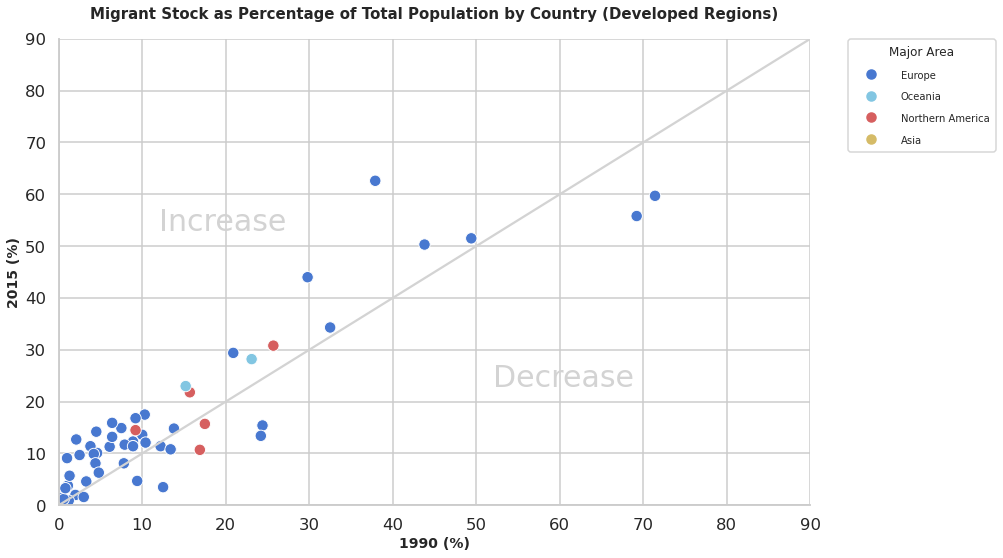

In [21]:
#relationship of countries 1990 and 2015 migrant stock for developed regions

#dropping outlier & setting up data
midyearstockdeveloped = midyearstock[midyearstock.developed_region == "Yes"]
midyearstockdevelopedboth = midyearstockdeveloped[midyearstockdeveloped.gender == "Both"]
midyearstockdevelopedboth = midyearstockdevelopedboth[midyearstockdevelopedboth.country_or_area != "Holy See"]
midyearstockdevelopedboth2015 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 2015].set_index('country_code')
midyearstockdevelopedboth1990 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 1990].set_index('country_code')

#setting up scatterplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
sns.scatterplot(x=midyearstockdevelopedboth1990['international_migrant_stock_as_perc_total_population'], 
                y=midyearstockdevelopedboth2015['international_migrant_stock_as_perc_total_population'], 
                hue=midyearstockdevelopedboth2015['major_area'],
                  palette=['b','c','r','y'],
                s=130)

#styling scatterplot
plt.xlabel('1990 (%)',weight = 'bold', fontsize=14)
plt.ylabel('2015 (%)',weight = 'bold', fontsize=14)
plt.legend(title='Major Area', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,90)
plt.ylim(0,90)
plt.title('Migrant Stock as Percentage of Total Population by Country (Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,90], [0, 2, 4, 50,90], color='lightgrey')
plt.text(52, 23, "Decrease", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
plt.text(12, 53, "Increase", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
fig.set_size_inches(12, 8)

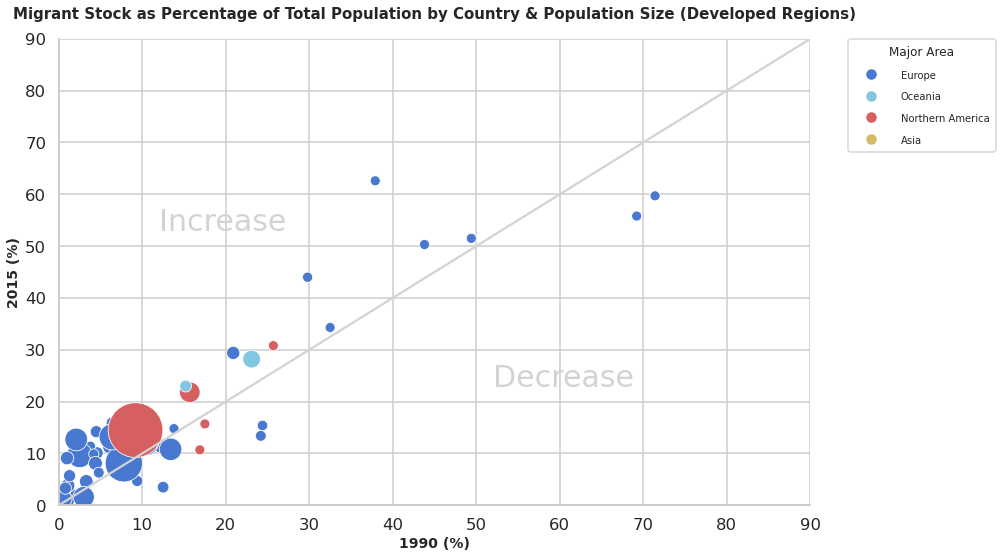

In [22]:
#relationship of countries 1990 and 2015 migrant stock for developed regions, including 2015 population marker

midyearstockdeveloped = midyearstock[midyearstock.developed_region == "Yes"]
midyearstockdevelopedboth = midyearstockdeveloped[midyearstockdeveloped.gender == "Both"]
midyearstockdevelopedboth = midyearstockdevelopedboth[midyearstockdevelopedboth.country_or_area != "Holy See"]

midyearstockdevelopedboth2015 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 2015].set_index('country_code')
midyearstockdevelopedboth1990 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 1990].set_index('country_code')

fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
d = sns.scatterplot(x=midyearstockdevelopedboth1990['international_migrant_stock_as_perc_total_population'], 
                y=midyearstockdevelopedboth2015['international_migrant_stock_as_perc_total_population'], 
                hue=midyearstockdevelopedboth2015['major_area'],
                size=midyearstockdevelopedboth2015['total_population_at_midyear'], #population marker
                sizes=(100,3000),
                palette=['b','c','r','y'],
                s=130)

plt.xlabel('1990 (%)',weight = 'bold', fontsize=14)
plt.ylabel('2015 (%)',weight = 'bold', fontsize=14)
h,l = d.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],title='Major Area',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,90)
plt.ylim(0,90)
plt.title('Migrant Stock as Percentage of Total Population by Country & Population Size (Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,90], [0, 2, 4, 50,90], color='lightgrey')
plt.text(52, 23, "Decrease", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
plt.text(12, 53, "Increase", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
fig.set_size_inches(12, 8)

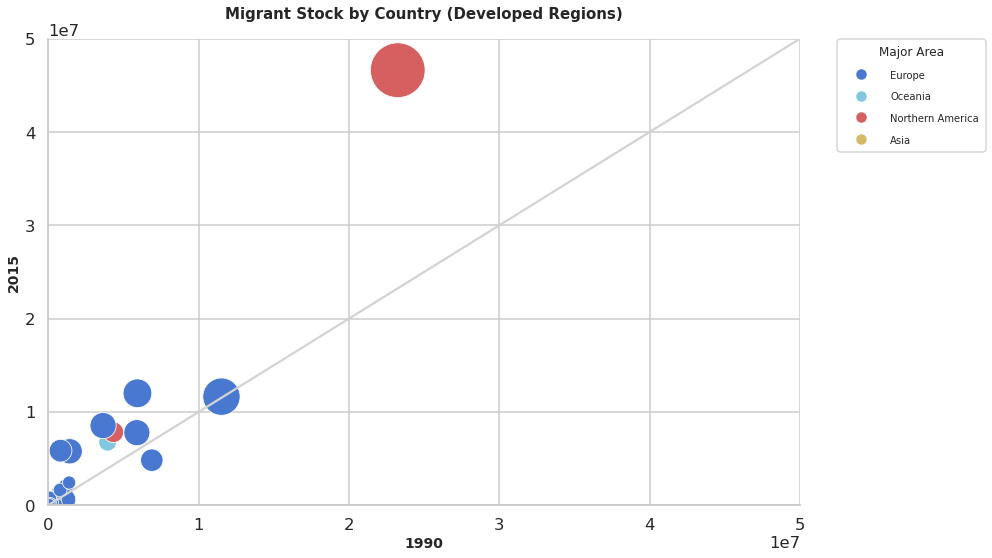

In [23]:
#relationship of countries 1990 and 2015 migrant stock for developed regions

#dropping outlier & setting up data
midyearstockdeveloped = midyearstock[midyearstock.developed_region == "Yes"]
midyearstockdevelopedboth = midyearstockdeveloped[midyearstockdeveloped.gender == "Both"]
midyearstockdevelopedboth = midyearstockdevelopedboth[midyearstockdevelopedboth.country_or_area != "Holy See"]
midyearstockdevelopedboth2015 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 2015].set_index('country_code')
midyearstockdevelopedboth1990 = midyearstockdevelopedboth[midyearstockdevelopedboth.year == 1990].set_index('country_code')


#setting up scatterplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
e = sns.scatterplot(x=midyearstockdevelopedboth1990['international_midyear_stock'], 
                y=midyearstockdevelopedboth2015['international_midyear_stock'], 
                hue=midyearstockdevelopedboth2015['major_area'],
                size=midyearstockdevelopedboth2015['total_population_at_midyear'], #population marker
                sizes=(100,3000),
                palette=['b','c','r','y'],
                s=130)


#styling scatterplot
plt.xlabel('1990',weight = 'bold', fontsize=14)
plt.ylabel('2015',weight = 'bold', fontsize=14)
h,l = d.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],title='Major Area',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,50000000)
plt.ylim(0,50000000)
plt.title('Migrant Stock by Country (Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,50000000], [0, 2, 4, 50,50000000], color='lightgrey')

fig.set_size_inches(12, 8)

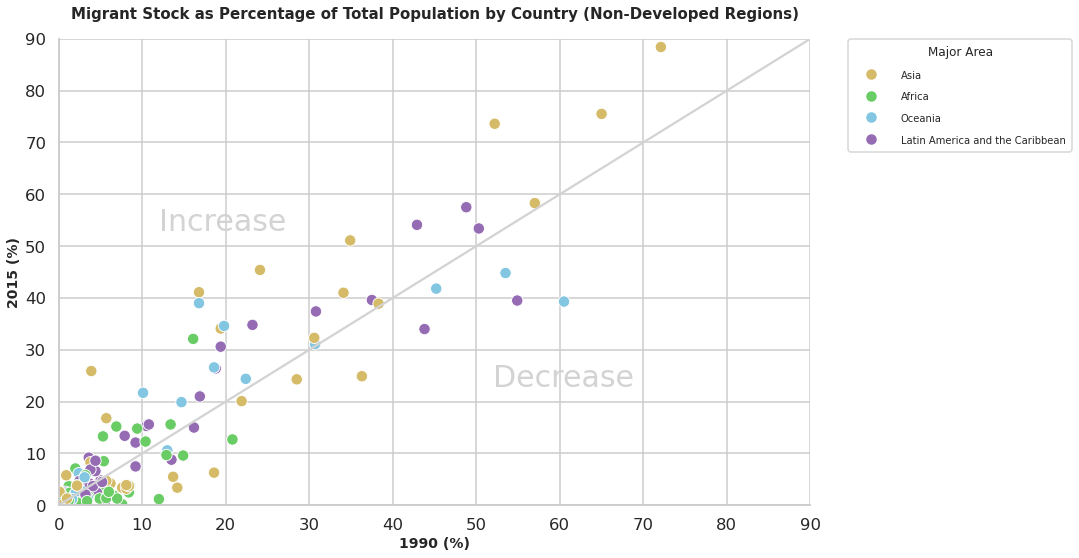

In [24]:
#relationship of countries 1990 and 2015 migrant stock for non-developed regions

#dropping outlier & setting up data
midyearstocknondeveloped = midyearstock[midyearstock.developed_region == "No"]
midyearstocknondevelopedboth = midyearstocknondeveloped[midyearstocknondeveloped.gender == "Both"]
midyearstocknondevelopedboth = midyearstocknondevelopedboth[midyearstocknondevelopedboth.country_or_area != "Holy See"]
midyearstocknondevelopedboth2015 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 2015].set_index('country_code')
midyearstocknondevelopedboth1990 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 1990].set_index('country_code')

#setting up scatterplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
sns.scatterplot(x=midyearstocknondevelopedboth1990['international_migrant_stock_as_perc_total_population'], 
                y=midyearstocknondevelopedboth2015['international_migrant_stock_as_perc_total_population'], 
                hue=midyearstocknondevelopedboth2015['major_area'],
                palette=['y','g','c','m'],
                s=130)

#styling scatterplot
plt.xlabel('1990 (%)',weight = 'bold', fontsize=14)
plt.ylabel('2015 (%)',weight = 'bold', fontsize=14)
plt.legend(title='Major Area', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,90)
plt.ylim(0,90)
plt.title('Migrant Stock as Percentage of Total Population by Country (Non-Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,90], [0, 2, 4, 50,90], color='lightgrey')
plt.text(52, 23, "Decrease", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
plt.text(12, 53, "Increase", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
fig.set_size_inches(12, 8)

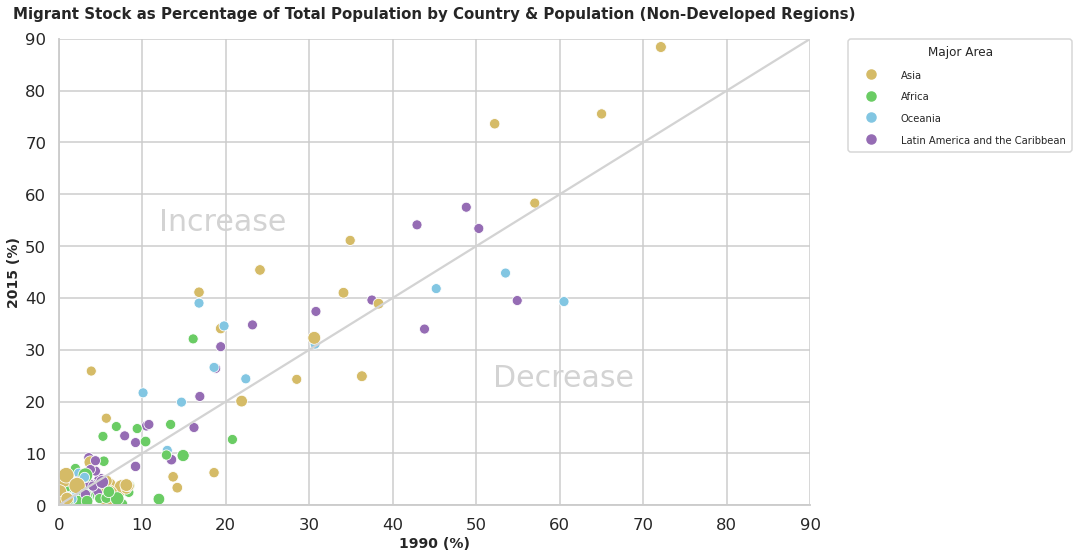

In [25]:
#relationship of countries 1990 and 2015 migrant stock for non-developed regions, including 2015 population marker

midyearstocknondeveloped = midyearstock[midyearstock.developed_region == "No"]
midyearstocknondevelopedboth = midyearstocknondeveloped[midyearstocknondeveloped.gender == "Both"]
midyearstocknondevelopedboth = midyearstocknondevelopedboth[midyearstocknondevelopedboth.country_or_area != "Holy See"]

midyearstocknondevelopedboth2015 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 2015].set_index('country_code')
midyearstocknondevelopedboth1990 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 1990].set_index('country_code')

fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
n = sns.scatterplot(x=midyearstocknondevelopedboth1990['international_migrant_stock_as_perc_total_population'], 
                y=midyearstocknondevelopedboth2015['international_migrant_stock_as_perc_total_population'], 
                hue=midyearstocknondevelopedboth2015['major_area'],
                palette=['y','g','c','m'],
                size=midyearstocknondevelopedboth2015['total_population_at_midyear'], #population marker
                sizes=(100,3000),
                s=130)

plt.xlabel('1990 (%)',weight = 'bold', fontsize=14)
plt.ylabel('2015 (%)',weight = 'bold', fontsize=14)
h,l = n.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],title='Major Area',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,90)
plt.ylim(0,90)
plt.title('Migrant Stock as Percentage of Total Population by Country & Population (Non-Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,90], [0, 2, 4, 50,90], color='lightgrey')
plt.text(52, 23, "Decrease", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
plt.text(12, 53, "Increase", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
fig.set_size_inches(12, 8)

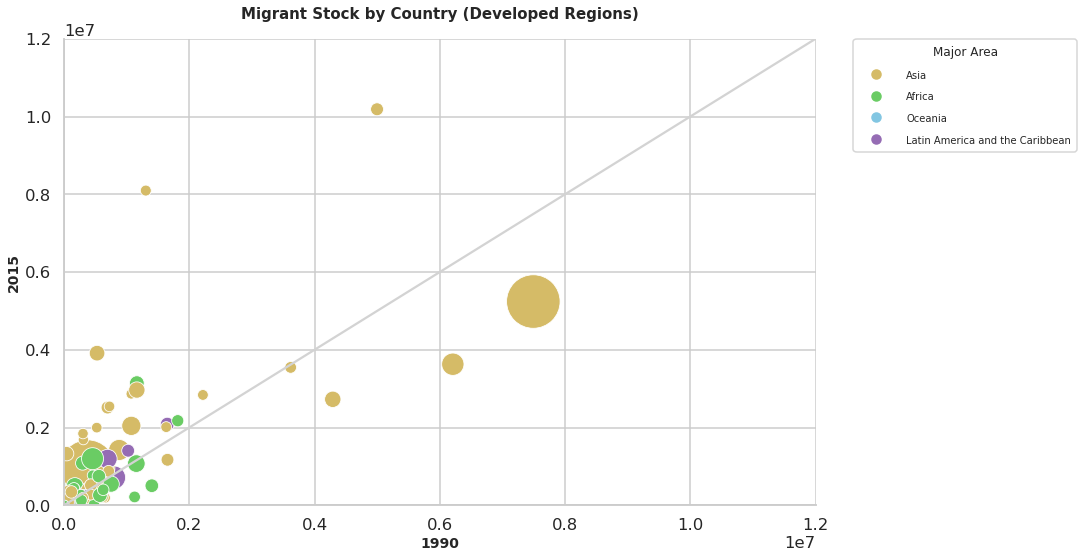

In [26]:
#relationship of countries 1990 and 2015 migrant stock for non-developed regions, including 2015 population marker

midyearstocknondeveloped = midyearstock[midyearstock.developed_region == "No"]
midyearstocknondevelopedboth = midyearstocknondeveloped[midyearstocknondeveloped.gender == "Both"]
midyearstocknondevelopedboth = midyearstocknondevelopedboth[midyearstocknondevelopedboth.country_or_area != "Holy See"]

midyearstocknondevelopedboth2015 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 2015].set_index('country_code')
midyearstocknondevelopedboth1990 = midyearstocknondevelopedboth[midyearstocknondevelopedboth.year == 1990].set_index('country_code')

fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
j = sns.scatterplot(x=midyearstocknondevelopedboth1990['international_midyear_stock'], 
                y=midyearstocknondevelopedboth2015['international_midyear_stock'], 
                hue=midyearstocknondevelopedboth2015['major_area'],
                palette=['y','g','c','m'],
                size=midyearstocknondevelopedboth2015['total_population_at_midyear'], #population marker
                sizes=(100,3000),
                s=130)

#styling scatterplot
plt.xlabel('1990',weight = 'bold', fontsize=14)
plt.ylabel('2015',weight = 'bold', fontsize=14)
h,l = j.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],title='Major Area',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,12000000)
plt.ylim(0,12000000)
plt.title('Migrant Stock by Country (Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,50000000], [0, 2, 4, 50,50000000], color='lightgrey')
fig.set_size_inches(12, 8)

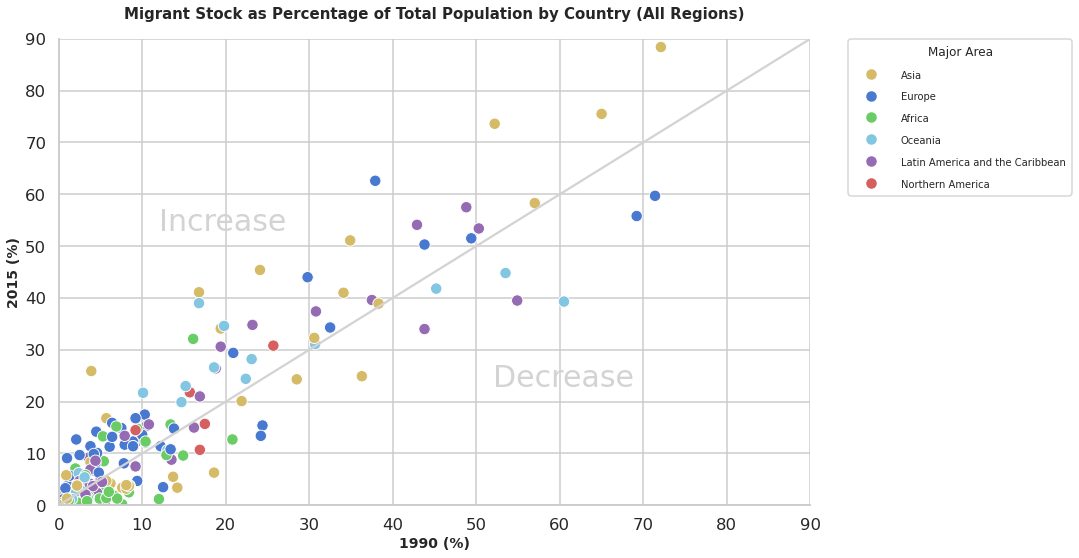

In [28]:
#relationship of countries 1990 and 2015 migrant stock for all regions
#not included in final analysis

#dropping outlier & setting up data
midyearstockboth = midyearstock[midyearstock.gender == "Both"]
midyearstockboth = midyearstockboth[midyearstockboth.country_or_area != "Holy See"]
midyearstockboth2015 = midyearstockboth[midyearstockboth.year == 2015].set_index('country_code')
midyearstockboth1990 = midyearstockboth[midyearstockboth.year == 1990].set_index('country_code')
midyearstockboth1990.sort_values('international_midyear_stock', ascending=False)

#setting up scatterplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.despine()
sns.set_context('talk')
sns.scatterplot(x=midyearstockboth1990['international_migrant_stock_as_perc_total_population'], 
                y=midyearstockboth2015['international_migrant_stock_as_perc_total_population'], 
                hue=midyearstockboth2015['major_area'],
                palette=['y','b','g','c','m','r'],
                s=130)

#styling scatterplot
plt.xlabel('1990 (%)',weight = 'bold', fontsize=14)
plt.ylabel('2015 (%)',weight = 'bold', fontsize=14)
plt.legend(title='Major Area', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.xlim(0,90)
plt.ylim(0,90)
plt.title('Migrant Stock as Percentage of Total Population by Country (All Regions)', weight = 'bold', fontsize = 15, pad=20)
ax.plot([0, 2, 4, 50,90], [0, 2, 4, 50,90], color='lightgrey')
plt.text(52, 23, "Decrease", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
plt.text(12, 53, "Increase", horizontalalignment='left', size='30', color='lightgrey', weight='regular')
fig.set_size_inches(12, 8)

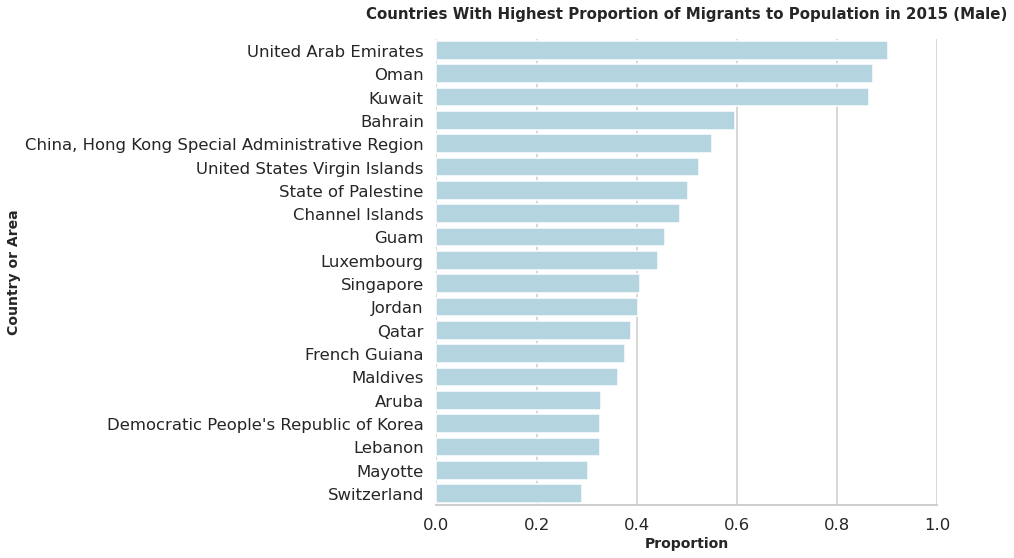

In [29]:
#countries with the highest proportion of migrant stock 2015, Male

#dropping outliers and setting up data
midyearstock['migrant_proportion'] = midyearstock['international_midyear_stock']/midyearstock['total_population_at_midyear']
midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]
midyearstock2015male = midyearstock2015[midyearstock2015.gender == "Male"].set_index('country_code')
midyearstock2015male = midyearstock2015male[midyearstock2015male.migrant_proportion > 0.29] #to account for top 20
midyearstock2015male = midyearstock2015male.sort_values('migrant_proportion', ascending=False)

#setting up & styling barplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015male['migrant_proportion'], y=midyearstock2015male['country_or_area'],
            label="Male", color="lightblue")

plt.xlabel('Proportion',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,1.0)
plt.title('Countries With Highest Proportion of Migrants to Population in 2015 (Male)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8, 8)

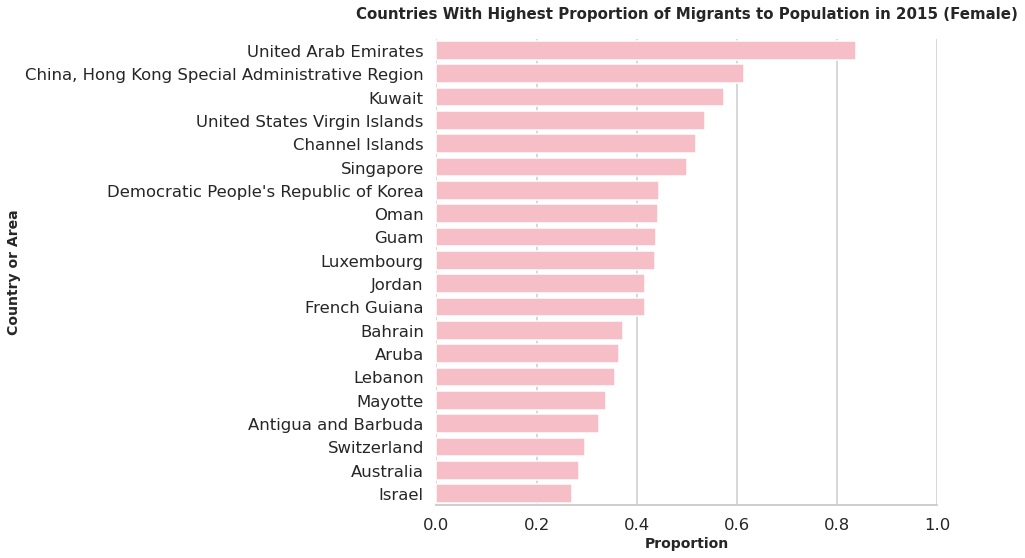

In [30]:
#countries with the highest proportion of migrant stock 2015, Female

#dropping outlier and setting up data
midyearstock['migrant_proportion'] = midyearstock['international_midyear_stock']/midyearstock['total_population_at_midyear']
midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]
midyearstock2015female = midyearstock2015[midyearstock2015.gender == "Female"].set_index('country_code')
midyearstock2015female = midyearstock2015female[midyearstock2015female.migrant_proportion > 0.27] #to account for top 20
midyearstock2015female = midyearstock2015female.sort_values('migrant_proportion', ascending=False)

#setting up & styling barplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015female['migrant_proportion'], y=midyearstock2015female['country_or_area'],
            label="Female", color="lightpink")

plt.xlabel('Proportion',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,1.0)
plt.title('Countries With Highest Proportion of Migrants to Population in 2015 (Female)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,8)

In [51]:
midyearstock2015malefemale = pd.DataFrame()

midyearstock2015female = midyearstock2015[midyearstock2015.gender == "Female"].set_index('country_code')
midyearstock2015male = midyearstock2015[midyearstock2015.gender == "Male"].set_index('country_code')

midyearstock2015female = midyearstock2015female.sort_values('migrant_proportion', ascending=False)
midyearstock2015male = midyearstock2015male.sort_values('migrant_proportion', ascending=False)

midyearstock2015malefemale['Relative Male Migrant Proportion'] = midyearstock2015male['migrant_proportion']
midyearstock2015malefemale['Relative Female Migrant Proportion'] = midyearstock2015female['migrant_proportion']
(midyearstock2015malefemale.corr())

Relative Male Migrant Proportion  \
Relative Male Migrant Proportion                            1.000000   
Relative Female Migrant Proportion                          0.942601   

                                    Relative Female Migrant Proportion  
Relative Male Migrant Proportion                              0.942601  
Relative Female Migrant Proportion                            1.000000

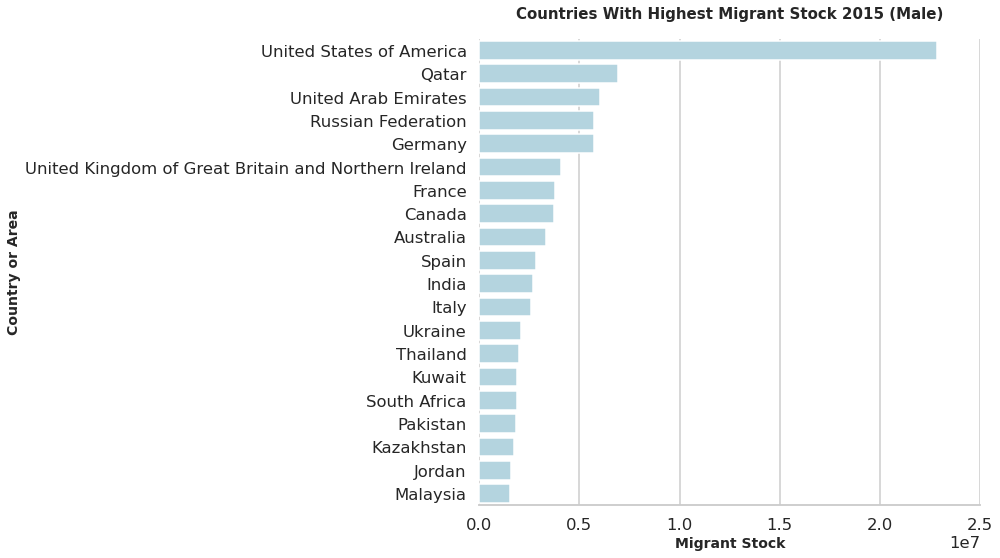

In [78]:
#countries with the highest volume of migrant stock 2015, Female

#dropping outlier and setting up data
midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]
midyearstock2015male = midyearstock2015[midyearstock2015.gender == "Male"].set_index('country_code')
midyearstock2015male = midyearstock2015male[midyearstock2015male.international_midyear_stock > 1520000] #to account for top 20
midyearstock2015male = midyearstock2015male.sort_values('international_midyear_stock', ascending=False)

#setting up & styling barplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015male['international_midyear_stock'], y=midyearstock2015male['country_or_area'],
            label="Female", color="lightblue")

plt.xlabel('Migrant Stock',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,25000000)
plt.title('Countries With Highest Migrant Stock 2015 (Male)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,8)

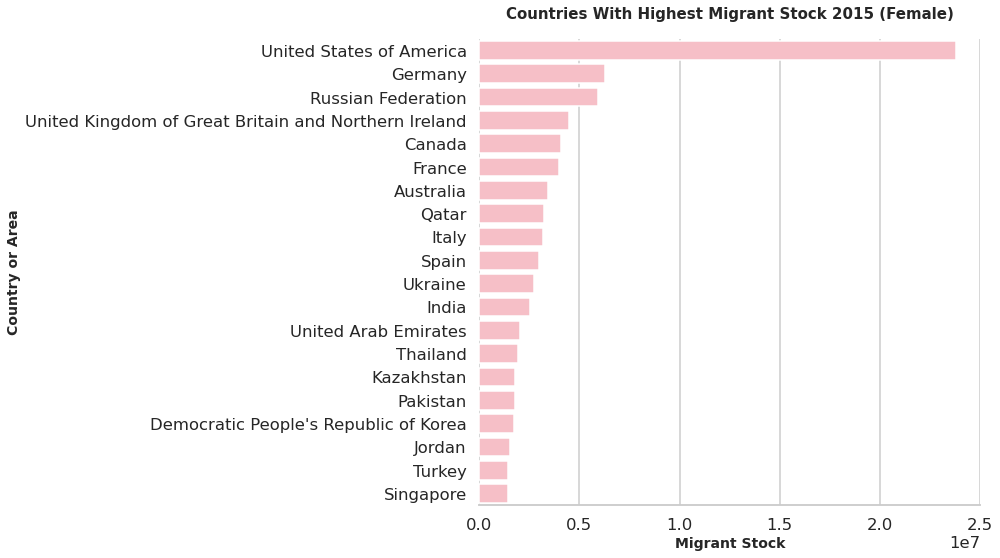

In [82]:
#countries with the highest volume of migrant stock 2015, Female

#dropping outlier and setting up data
midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]
midyearstock2015female = midyearstock2015[midyearstock2015.gender == "Female"].set_index('country_code')
midyearstock2015female = midyearstock2015female[midyearstock2015female.international_midyear_stock > 1400000] #to account for top 20
midyearstock2015female = midyearstock2015female.sort_values('international_midyear_stock', ascending=False)

#setting up & styling barplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015female['international_midyear_stock'], y=midyearstock2015female['country_or_area'],
            label="Female", color="lightpink")

plt.xlabel('Migrant Stock',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,25000000)
plt.title('Countries With Highest Migrant Stock 2015 (Female)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,8)

In [113]:
midyearstock2015malefemalevolume = pd.DataFrame()

midyearstock2015female = midyearstock2015[midyearstock2015.gender == "Female"].set_index('country_code')
midyearstock2015male = midyearstock2015[midyearstock2015.gender == "Male"].set_index('country_code')

midyearstock2015female = midyearstock2015female.sort_values('international_midyear_stock', ascending=False)
midyearstock2015male = midyearstock2015male.sort_values('international_midyear_stock', ascending=False)

midyearstock2015malefemalevolume['Male Migrant Stock Developed)'] = midyearstock2015male['international_midyear_stock']
midyearstock2015malefemalevolume['Female Migrant Stock'] = midyearstock2015female['international_midyear_stock']
(midyearstock2015malefemalevolume.corr())

Male Migrant Stock Developed)  \
Male Migrant Stock Developed)                       1.000000   
Female Migrant Stock                                0.974111   

                               Female Migrant Stock  
Male Migrant Stock Developed)              0.974111  
Female Migrant Stock                       1.000000

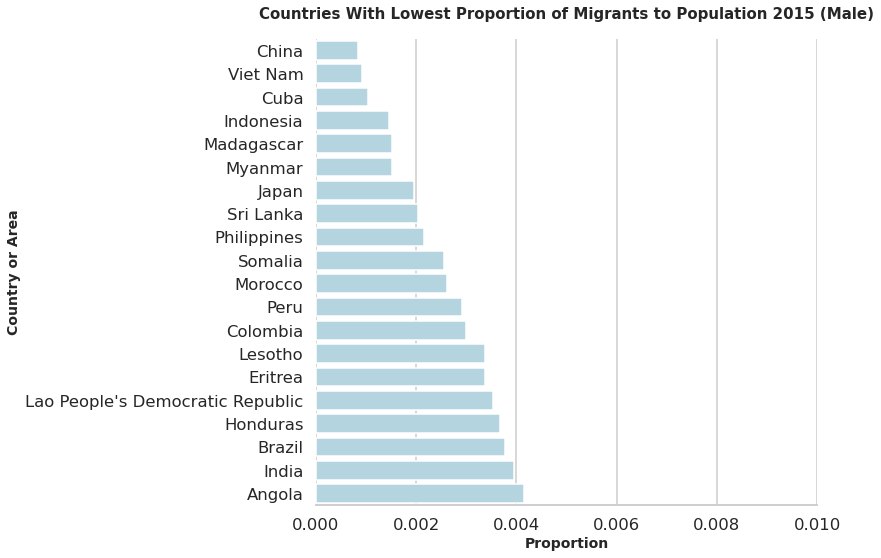

In [31]:
#countries with the lowest proportion of migrant stock between 2010 and 2015, Male 
#not included in final analysis

midyearstock['migrant_proportion'] = midyearstock['international_midyear_stock']/midyearstock['total_population_at_midyear']
midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]
midyearstock2015male = midyearstock2015[midyearstock2015.gender == "Male"].set_index('country_code')
midyearstock2015male = midyearstock2015male[midyearstock2015male.migrant_proportion < 0.0042] #to account for bottom 20
midyearstock2015male = midyearstock2015male.sort_values('migrant_proportion', ascending=True)

fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015male['migrant_proportion'], y=midyearstock2015male['country_or_area'],
            label="Male", color="lightblue")

plt.xlabel('Proportion',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,0.01)
plt.title('Countries With Lowest Proportion of Migrants to Population 2015 (Male)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8, 8)

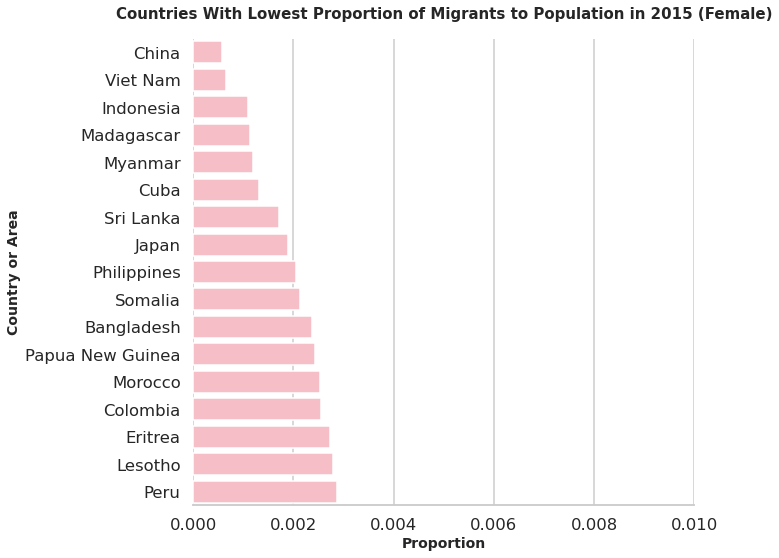

In [32]:
#countries with the lowest proportion of migrant stock 2015, Female
#not included in final analysis

midyearstock['migrant_proportion'] = midyearstock['international_midyear_stock']/midyearstock['total_population_at_midyear']

midyearstock2015 = midyearstock[midyearstock.year == 2015]
midyearstock2015 = midyearstock2015[midyearstock2015.country_or_area != "Holy See"]

midyearstock2015female = midyearstock2015[midyearstock2015.gender == "Female"].set_index('country_code')
midyearstock2015female = midyearstock2015female[midyearstock2015female.migrant_proportion < 0.003] #to account for bottom 20
midyearstock2015female = midyearstock2015female.sort_values('migrant_proportion', ascending=True)

fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=midyearstock2015female['migrant_proportion'], y=midyearstock2015female['country_or_area'],
            label="Female", color="lightpink")

plt.xlabel('Proportion',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.xlim(0,0.01)
plt.title('Countries With Lowest Proportion of Migrants to Population in 2015 (Female)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,8)

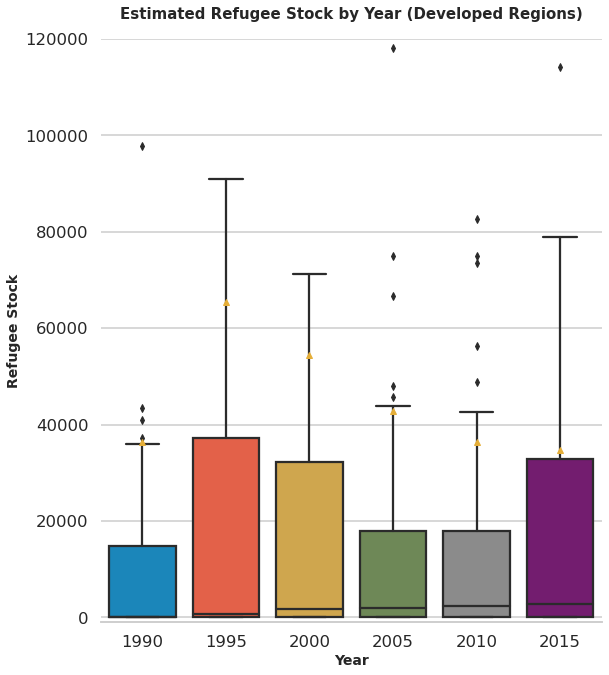

In [33]:
#15 year trends in estimated refugee stock, developed regions
#not included in final analysis

#setting up data
totalestimatesboth = totalestimates[totalestimates.gender == "Both"]
totalestimatesbothdeveloped = totalestimatesboth[totalestimatesboth.developed_region == "Yes"]

#setting up & styling boxplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.boxplot(x='year',y='estimate_total_refugee_stock_at_midyear', data=totalestimatesbothdeveloped, showmeans=True) #yellow markers

plt.xlabel('Year',weight = 'bold', fontsize=14)
plt.ylabel('Refugee Stock',weight = 'bold', fontsize=14)
plt.ylim(-1000,120000) #for readability & consistency
plt.title('Estimated Refugee Stock by Year (Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,10)

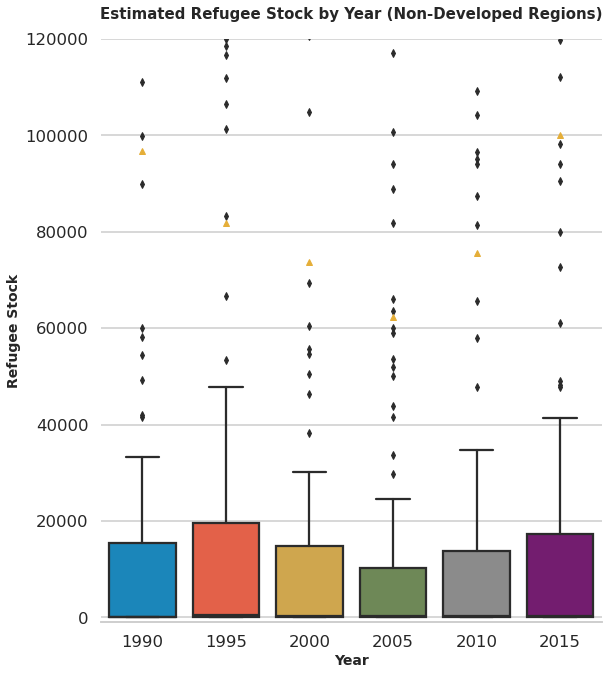

In [34]:
#15 year trends in estimated refugee stock, non-developed regions
#not included in final analysis

#setting up data
totalestimatesboth = totalestimates[totalestimates.gender == "Both"]
totalestimatesbothnondeveloped = totalestimatesboth[totalestimatesboth.developed_region == "No"]

#setting up & styling boxplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.boxplot(x='year',y='estimate_total_refugee_stock_at_midyear', data=totalestimatesbothnondeveloped, showmeans=True) #yellow markers

plt.xlabel('Year',weight = 'bold', fontsize=14)
plt.ylabel('Refugee Stock',weight = 'bold', fontsize=14)
plt.ylim(-1000,120000) #for readability & consistency
plt.title('Estimated Refugee Stock by Year (Non-Developed Regions)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,10)

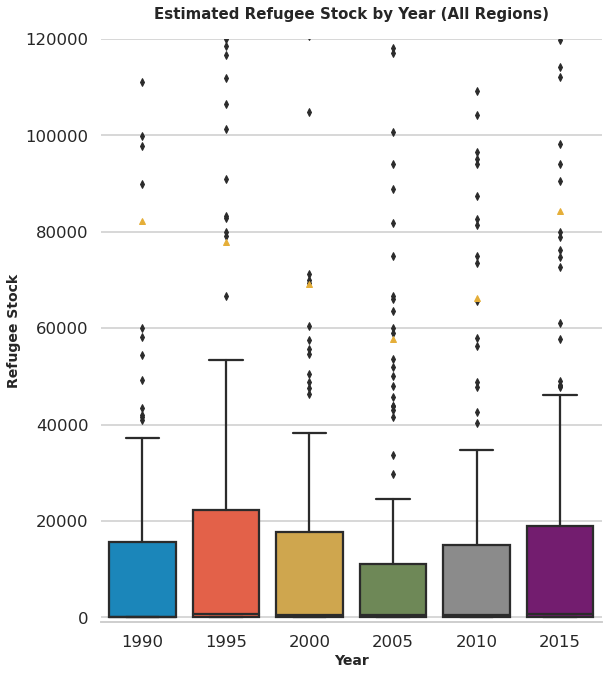

In [35]:
#15 year trends in estimated refugee stock, all regions
#not included in final analysis

#setting up data
totalestimatesboth = totalestimates[totalestimates.gender == "Both"]

#setting up & styling boxplot
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.boxplot(x='year',y='estimate_total_refugee_stock_at_midyear', data=totalestimatesboth, showmeans=True) #yellow markers

plt.xlabel('Year',weight = 'bold', fontsize=14)
plt.ylabel('Refugee Stock',weight = 'bold', fontsize=14)
plt.ylim(-1000,120000) #for readability & consistency
plt.title('Estimated Refugee Stock by Year (All Regions)', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,10)

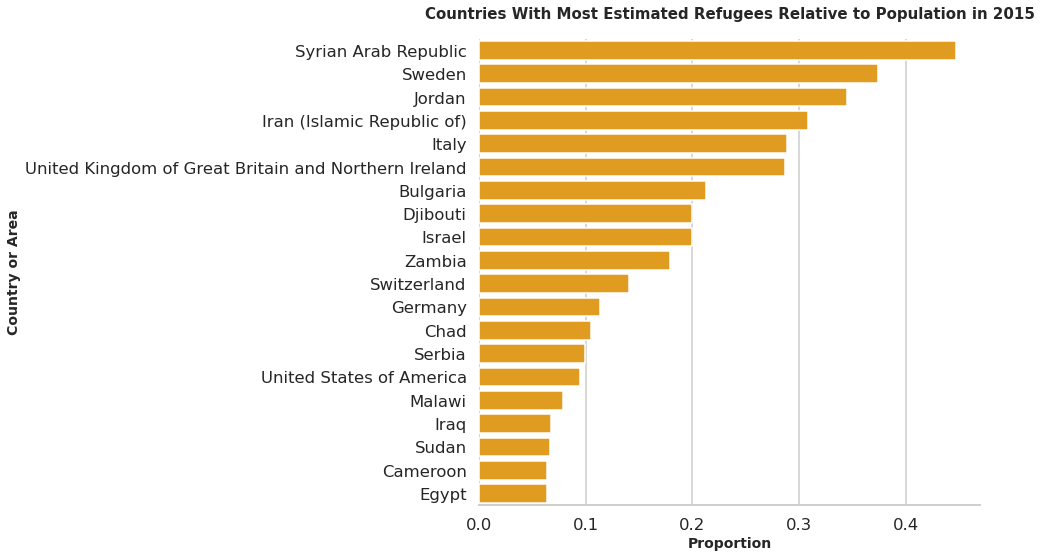

In [36]:
#countries with the most refugees relative to population in 2015
#not included in final analysis

#setting up data
totalestimates.set_index('country_code')
midyearstock.set_index('country_code')
totalestimates['refugee_proportion'] = totalestimates['estimate_total_refugee_stock_at_midyear']/midyearstock['total_population_at_midyear']
totalestimatesboth = totalestimates[totalestimates.year == 2015]
totalestimatesboth = totalestimatesboth[totalestimatesboth.gender == "Both"]
totalestimatesboth = totalestimatesboth[totalestimatesboth.refugee_proportion > 0.063] #dropping bad data/outliers
totalestimatesboth = totalestimatesboth[totalestimatesboth.refugee_proportion < 0.5] #to focus on top 20
totalestimatesboth = totalestimatesboth.sort_values('refugee_proportion', ascending=False)

#setting up and styling barplot
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_color_codes("muted")
sns.barplot(x=totalestimatesboth['refugee_proportion'], y=totalestimatesboth['country_or_area'],
            label="Refugees", color='orange')

plt.xlabel('Proportion',weight = 'bold', fontsize=14)
plt.ylabel('Country or Area',weight = 'bold', fontsize=14)
plt.title('Countries With Most Estimated Refugees Relative to Population in 2015', weight = 'bold', fontsize = 15, pad=20)
sns.despine(left=True)

fig.set_size_inches(8,8)